# Climate Change Data Analysis

## Complete analysis workflow including data cleaning, exploratory analysis, visualization, and machine learning modeling

In [1]:
# Load Required Libraries
library(tidyverse)
library(lubridate)
library(ggplot2)
library(gridExtra)
library(grid)

# Define Color Palette
color1 <- "#516faa"
color2 <- "#163542"
color3 <- "#eaefff"
color4 <- "#c8d8ef"
color5 <- "#7d96c1"

# Define Theme
my_theme <- theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold", color = color2),
    plot.subtitle = element_text(hjust = 0.5, size = 11, color = color1),
    axis.title = element_text(size = 10, color = color2),
    panel.grid.major = element_line(color = color3),
    panel.grid.minor = element_blank()
  )

cat("Setup complete!\n")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(gridExtra): there is no package called ‘gridExtra’


## 1. Data Cleaning & Preparation

In [ ]:
# Load and Prepare Data
climate_data <- read.csv("climate_change_dataset.csv")

climate_clean <- climate_data %>%
  rename(
    Year = 1, Month = 2, Avg_Temp = 3, Max_Temp = 4, Min_Temp = 5,
    Precipitation = 6, Humidity = 7, Wind_Speed = 8, Solar_Irradiance = 9,
    Cloud_Cover = 10, CO2_Concentration = 11, Latitude = 12, Longitude = 13,
    Altitude = 14, Proximity_to_Water = 15, Urbanization_Index = 16,
    Vegetation_Index = 17, ENSO_Index = 18, Particulate_Matter = 19,
    Sea_Surface_Temp = 20
  ) %>%
  mutate(across(c(Year, Month), as.integer),
         across(Avg_Temp:Sea_Surface_Temp, as.numeric),
         Date = make_date(Year, Month, 1), .after = Month)

cat("Data loaded:", nrow(climate_clean), "rows,", ncol(climate_clean), "columns\n")

Warning message:
"There were 8 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(c(Year, Month), as.integer)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 remaining warnings."


Data loaded: 53 rows, 21 columns


In [ ]:
# Create Date column from Year and Month
climate_clean <- climate_clean %>%
  mutate(
    Date = make_date(Year, Month, 1),  # First day of each month
    .after = Month  # Place Date column after Month
  )

cat("\n===== Date Sample =====\n")
head(climate_clean %>% select(Year, Month, Date))


===== Date Sample =====


,Year,Month,Date
,<int>,<int>,<date>
1,NA,1,NA
2,2020,2,2020-02-01
3,2020,3,2020-03-01
4,NA,4,NA
5,2020,5,2020-05-01
6,2020,6,2020-06-01


In [ ]:
# Convert data types to appropriate format
climate_clean <- climate_clean %>%
  mutate(
    # Convert Year and Month to integer
    Year = as.integer(Year),
    Month = as.integer(Month),

    # Convert numeric columns from text to numeric
    Avg_Temp = as.numeric(Avg_Temp),
    Max_Temp = as.numeric(Max_Temp),
    Min_Temp = as.numeric(Min_Temp),
    Precipitation = as.numeric(Precipitation),
    Humidity = as.numeric(Humidity),
    Wind_Speed = as.numeric(Wind_Speed),
    Solar_Irradiance = as.numeric(Solar_Irradiance),
    Cloud_Cover = as.numeric(Cloud_Cover),
    CO2_Concentration = as.numeric(CO2_Concentration),
    Latitude = as.numeric(Latitude),
    Longitude = as.numeric(Longitude),
    Altitude = as.numeric(Altitude),
    Proximity_to_Water = as.numeric(Proximity_to_Water),
    Urbanization_Index = as.numeric(Urbanization_Index),
    Vegetation_Index = as.numeric(Vegetation_Index),
    ENSO_Index = as.numeric(ENSO_Index),
    Particulate_Matter = as.numeric(Particulate_Matter),
    Sea_Surface_Temp = as.numeric(Sea_Surface_Temp)
  )

cat("\n===== After Type Conversion =====\n")
str(climate_clean)


===== After Type Conversion =====


'data.frame':	53 obs. of  21 variables:
 $ Year              : int  NA 2020 2020 NA 2020 2020 NA 2020 2020 2020 ...
 $ Month             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date              : Date, format: NA "2020-02-01" ...
 $ Avg_Temp          : num  -3.4605 NA 7.8698 -0.0499 19.8951 ...
 $ Max_Temp          : num  33.1 25.9 18.6 13 35.9 ...
 $ Min_Temp          : num  NA 3.17 10.42 -9.2 20.07 ...
 $ Precipitation     : num  184.9 2.96 NA 102.45 185.73 ...
 $ Humidity          : num  89.6 95.2 NA NA 74 ...
 $ Wind_Speed        : num  9.743 10.648 NA 0.899 13.128 ...
 $ Solar_Irradiance  : num  NA 252 247 143 170 ...
 $ Cloud_Cover       : num  58.53 32.86 29.38 17.5 2.19 ...
 $ CO2_Concentration : num  NA 420 417 419 402 ...
 $ Latitude          : num  40.7 40.7 40.7 40.7 40.7 ...
 $ Longitude         : num  NA -74 -74 -74 -74 ...
 $ Altitude          : num  10 10 10 10 10 10 10 10 10 10 ...
 $ Proximity_to_Water: num  15 15 15 15 99999 ...
 $ Urbanization_Index: num  NA 1.00e+05 3.

In [ ]:
# Calculate missing values count in each column
cat("\n===== Missing Values Per Column =====\n")
missing_counts <- colSums(is.na(climate_clean))
print(missing_counts)

# Calculate missing values percentage
cat("\n===== Missing Values Percentage =====\n")
missing_percentages <- (colSums(is.na(climate_clean)) / nrow(climate_clean)) * 100
print(round(missing_percentages, 2))

# Display missing values summary
cat("\n===== Missing Values Summary =====\n")
cat("Total rows:", nrow(climate_clean), "\n")
cat("Rows with missing values:", sum(!complete.cases(climate_clean)), "\n")


===== Missing Values Per Column =====
              Year              Month               Date           Avg_Temp 
                 6                  6                 12                  7 
          Max_Temp           Min_Temp      Precipitation           Humidity 
                 8                  9                  5                  9 
        Wind_Speed   Solar_Irradiance        Cloud_Cover  CO2_Concentration 
                 3                  6                  5                  6 
          Latitude          Longitude           Altitude Proximity_to_Water 
                 7                  4                  5                  7 
Urbanization_Index   Vegetation_Index         ENSO_Index Particulate_Matter 
                 3                  4                  4                  4 
  Sea_Surface_Temp 
                 8 



===== Missing Values Percentage =====
              Year              Month               Date           Avg_Temp 
             11.32              11.32              22.64              13.21 
          Max_Temp           Min_Temp      Precipitation           Humidity 
             15.09              16.98               9.43              16.98 
        Wind_Speed   Solar_Irradiance        Cloud_Cover  CO2_Concentration 
              5.66              11.32               9.43              11.32 
          Latitude          Longitude           Altitude Proximity_to_Water 
             13.21               7.55               9.43              13.21 
Urbanization_Index   Vegetation_Index         ENSO_Index Particulate_Matter 
              5.66               7.55               7.55               7.55 
  Sea_Surface_Temp 
             15.09 

===== Missing Values Summary =====
Total rows: 53 
Rows with missing values: 46 


In [ ]:
# Handle Missing Values using Interpolation
library(zoo)

cat("===== Starting Missing Values Treatment =====\n\n")

# Step 1: Sort data by date (important for interpolation)
climate_sorted <- climate_clean %>%
  arrange(Year, Month)

cat("✓ Data sorted by date\n\n")

# Step 2: Apply linear interpolation to numeric columns
cat("===== Applying Linear Interpolation =====\n")

climate_interpolated <- climate_sorted %>%
  mutate(across(
    c(Avg_Temp, Max_Temp, Min_Temp, Precipitation, Humidity,
      Wind_Speed, Solar_Irradiance, Cloud_Cover, CO2_Concentration,
      Latitude, Longitude, Altitude, Proximity_to_Water,
      Urbanization_Index, Vegetation_Index, ENSO_Index,
      Particulate_Matter, Sea_Surface_Temp),
    ~na.approx(., na.rm = FALSE, rule = 2)
  ))

# Step 3: Fill remaining missing values
climate_final <- climate_interpolated %>%
  fill(everything(), .direction = "downup") %>%
  filter(!is.na(Year) & !is.na(Month)) %>%
  mutate(Date = if_else(is.na(Date), make_date(Year, Month, 1), Date))

# Step 4: Final verification
cat("\n========== Final Verification ==========\n")
cat("Original rows:", nrow(climate_clean), "\n")
cat("Final rows:", nrow(climate_final), "\n")
cat("Rows removed:", nrow(climate_clean) - nrow(climate_final), "\n\n")

cat("Remaining missing values:\n")
print(colSums(is.na(climate_final)))

cat("\nTotal missing values:", sum(is.na(climate_final)), "\n")

# Step 5: Save cleaned data
write.csv(climate_final,
          'climate_data_clean_interpolated.csv',
          row.names = FALSE)

cat("\n✓ Cleaned data saved successfully!\n")


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




===== Starting Missing Values Treatment =====

✓ Data sorted by date

===== Applying Linear Interpolation =====

========== Final Verification ==========
Original rows: 53 
Final rows: 53 
Rows removed: 0 

Remaining missing values:
              Year              Month               Date           Avg_Temp 
                 0                  0                  0                  0 
          Max_Temp           Min_Temp      Precipitation           Humidity 
                 0                  0                  0                  0 
        Wind_Speed   Solar_Irradiance        Cloud_Cover  CO2_Concentration 
                 0                  0                  0                  0 
          Latitude          Longitude           Altitude Proximity_to_Water 
                 0                  0                  0                  0 
Urbanization_Index   Vegetation_Index         ENSO_Index Particulate_Matter 
                 0                  0                  0                  

### Missing Values Verification

In [ ]:
# Check for and Remove Duplicates

cat("===== Checking for Duplicates =====\n")

# Count duplicated rows
total_duplicates <- sum(duplicated(climate_final))
cat("Duplicated rows:", total_duplicates, "\n")

# Display duplicated rows (if any)
if(total_duplicates > 0) {
  cat("\nDuplicated rows:\n")
  print(climate_final[duplicated(climate_final), ])
}

# Remove duplicates
climate_no_dup <- climate_final %>%
  distinct()

cat("\nRows before:", nrow(climate_final), "\n")
cat("Rows after:", nrow(climate_no_dup), "\n")
cat("Rows removed:", nrow(climate_final) - nrow(climate_no_dup), "\n")

# Update data
climate_final <- climate_no_dup

===== Checking for Duplicates =====
Duplicated rows: 0 



Rows before: 53 
Rows after: 53 
Rows removed: 0 


### Outliers Detection and Treatment

In [ ]:
# Outliers and Logical Values Treatment

library(tidyverse)

cat("===== Data Before Treatment =====\n")
cat("Total rows:", nrow(climate_final), "\n\n")

# ===== 1. Check for illogical values before treatment =====
cat("===== Checking Illogical Values =====\n")

# Negative Precipitation
negative_precip <- climate_final %>%
  filter(Precipitation < 0)
cat("Negative precipitation:", nrow(negative_precip), "rows\n")
if(nrow(negative_precip) > 0) {
  print(negative_precip %>% select(Date, Precipitation))
}

# Humidity out of range (0-100)
invalid_humidity <- climate_final %>%
  filter(Humidity < 0 | Humidity > 100)
cat("Humidity out of range:", nrow(invalid_humidity), "rows\n")
if(nrow(invalid_humidity) > 0) {
  print(invalid_humidity %>% select(Date, Humidity))
}

# Negative Wind_Speed
negative_wind <- climate_final %>%
  filter(Wind_Speed < 0)
cat("Negative wind speed:", nrow(negative_wind), "rows\n")
if(nrow(negative_wind) > 0) {
  print(negative_wind %>% select(Date, Wind_Speed))
}

# ===== 2. Fix illogical values =====
cat("\n===== Fixing Illogical Values =====\n")

climate_corrected <- climate_final %>%
  mutate(
    # Fix Precipitation: negative values = 0
    Precipitation = ifelse(Precipitation < 0, 0, Precipitation),

    # Fix Humidity: range 0-100
    Humidity = case_when(
      Humidity < 0 ~ 0,
      Humidity > 100 ~ 100,
      TRUE ~ Humidity
    ),

    # Fix Wind_Speed: negative values = absolute value
    Wind_Speed = abs(Wind_Speed),

    # Fix Cloud_Cover: range 0-100
    Cloud_Cover = case_when(
      Cloud_Cover < 0 ~ 0,
      Cloud_Cover > 100 ~ 100,
      TRUE ~ Cloud_Cover
    )
  )

cat("✅ Illogical values fixed!\n")

# ===== 3. Handle outliers in Precipitation using IQR =====
cat("\n===== Handling Precipitation Outliers =====\n")

Q1_precip <- quantile(climate_corrected$Precipitation, 0.25, na.rm = TRUE)
Q3_precip <- quantile(climate_corrected$Precipitation, 0.75, na.rm = TRUE)
IQR_precip <- Q3_precip - Q1_precip

lower_bound_precip <- Q1_precip - 1.5 * IQR_precip
upper_bound_precip <- Q3_precip + 1.5 * IQR_precip

cat("Lower bound:", lower_bound_precip, "\n")
cat("Upper bound:", upper_bound_precip, "\n")

outliers_precip <- climate_corrected %>%
  filter(Precipitation > upper_bound_precip)

if(nrow(outliers_precip) > 0) {
  cat("Outliers detected:\n")
  print(outliers_precip %>% select(Date, Precipitation))

  median_precip <- median(climate_corrected$Precipitation, na.rm = TRUE)
  climate_corrected <- climate_corrected %>%
    mutate(Precipitation = ifelse(Precipitation > upper_bound_precip,
                                   median_precip,
                                   Precipitation))
  cat("✅ Outliers replaced with median:", median_precip, "\n")
}

# ===== 4. Handle outliers in Wind_Speed using IQR =====
cat("\n===== Handling Wind Speed Outliers =====\n")

Q1_wind <- quantile(climate_corrected$Wind_Speed, 0.25, na.rm = TRUE)
Q3_wind <- quantile(climate_corrected$Wind_Speed, 0.75, na.rm = TRUE)
IQR_wind <- Q3_wind - Q1_wind

lower_bound_wind <- Q1_wind - 1.5 * IQR_wind
upper_bound_wind <- Q3_wind + 1.5 * IQR_wind

cat("Lower bound:", lower_bound_wind, "\n")
cat("Upper bound:", upper_bound_wind, "\n")

outliers_wind <- climate_corrected %>%
  filter(Wind_Speed > upper_bound_wind)

if(nrow(outliers_wind) > 0) {
  cat("Outliers detected:\n")
  print(outliers_wind %>% select(Date, Wind_Speed))

  median_wind <- median(climate_corrected$Wind_Speed, na.rm = TRUE)
  climate_corrected <- climate_corrected %>%
    mutate(Wind_Speed = ifelse(Wind_Speed > upper_bound_wind,
                                median_wind,
                                Wind_Speed))
  cat("✅ Outliers replaced with median:", median_wind, "\n")
}

# ===== 5. Final verification =====
cat("\n========================================\n")
cat("         ✅ Final Verification ✅\n")
cat("========================================\n")

# Re-check outliers after treatment
cat("\n===== Outliers After Treatment =====\n")

for(col in c("Avg_Temp", "Precipitation", "Humidity", "Wind_Speed", "CO2_Concentration")) {
  Q1 <- quantile(climate_corrected[[col]], 0.25, na.rm = TRUE)
  Q3 <- quantile(climate_corrected[[col]], 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1

  lower <- Q1 - 1.5 * IQR
  upper <- Q3 + 1.5 * IQR

  outliers_count <- sum(climate_corrected[[col]] < lower |
                        climate_corrected[[col]] > upper, na.rm = TRUE)

  cat(col, ": ", outliers_count, " outliers\n", sep = "")
}

# Check logical ranges
cat("\n===== Checking Logical Ranges =====\n")
cat("Precipitation - Min:", min(climate_corrected$Precipitation, na.rm = TRUE),
    "Max:", max(climate_corrected$Precipitation, na.rm = TRUE), "\n")
cat("Humidity - Min:", min(climate_corrected$Humidity, na.rm = TRUE),
    "Max:", max(climate_corrected$Humidity, na.rm = TRUE), "\n")
cat("Wind_Speed - Min:", min(climate_corrected$Wind_Speed, na.rm = TRUE),
    "Max:", max(climate_corrected$Wind_Speed, na.rm = TRUE), "\n")

# Verify logic
validation_passed <- TRUE

if(min(climate_corrected$Precipitation, na.rm = TRUE) < 0) {
  cat("❌ Negative precipitation found!\n")
  validation_passed <- FALSE
}

if(min(climate_corrected$Humidity, na.rm = TRUE) < 0 ||
   max(climate_corrected$Humidity, na.rm = TRUE) > 100) {
  cat("❌ Humidity out of range!\n")
  validation_passed <- FALSE
}

if(min(climate_corrected$Wind_Speed, na.rm = TRUE) < 0) {
  cat("❌ Negative wind speed found!\n")
  validation_passed <- FALSE
}

if(validation_passed) {
  cat("\n✅✅✅ All values are logical! ✅✅✅\n")
}

# ===== 6. Final statistical summary =====
cat("\n===== Final Statistical Summary =====\n")
print(summary(climate_corrected %>%
              select(Avg_Temp, Precipitation, Humidity, Wind_Speed, CO2_Concentration)))

# ===== 7. Update final data =====
climate_final <- climate_corrected

# ===== 8. Save cleaned data =====
write.csv(climate_final,
          'climate_data_CLEAN_NO_OUTLIERS.csv',
          row.names = FALSE)

cat("\n💾 Cleaned data saved: climate_data_CLEAN_NO_OUTLIERS.csv\n")
cat("\n🎉 Data is clean and ready for analysis! 🎉\n")

===== Data Before Treatment =====
Total rows: 53 

===== Checking Illogical Values =====
Negative precipitation: 0 rows
Humidity out of range: 0 rows
Negative wind speed: 0 rows

===== Fixing Illogical Values =====
✅ Illogical values fixed!

===== Handling Precipitation Outliers =====
Lower bound: -121.8503 
Upper bound: 352.5246 
Outliers detected:
        Date Precipitation
1 2021-05-01         99999
✅ Outliers replaced with median: 111.6251 

===== Handling Wind Speed Outliers =====
Lower bound: -6.596309 
Upper bound: 23.89753 
Outliers detected:
        Date Wind_Speed
1 2020-10-01      99999
✅ Outliers replaced with median: 9.121688 

         ✅ Final Verification ✅

===== Outliers After Treatment =====
Avg_Temp: 0 outliers
Precipitation: 0 outliers
Humidity: 0 outliers
Wind_Speed: 0 outliers
CO2_Concentration: 0 outliers

===== Checking Logical Ranges =====
Precipitation - Min: 2.957244 Max: 199.4503 
Humidity - Min: 30.87108 Max: 98.05636 
Wind_Speed - Min: 0.3085581 Max: 14.96

In [ ]:
# Comprehensive Missing Values Verification

# Method 1: Display missing values count per column
cat("===== Missing Values Count Per Column =====\n")
missing_count <- colSums(is.na(climate_final))
print(missing_count)

# Method 2: Display missing values percentage
cat("\n===== Missing Values Percentage (%) =====\n")
missing_percentage <- (colSums(is.na(climate_final)) / nrow(climate_final)) * 100
print(round(missing_percentage, 2))

# Method 3: Overall summary
cat("\n===== Overall Summary =====\n")
cat("Total missing values in dataset:", sum(is.na(climate_final)), "\n")
cat("Total values:", nrow(climate_final) * ncol(climate_final), "\n")
cat("Overall missing percentage:",
    round((sum(is.na(climate_final)) / (nrow(climate_final) * ncol(climate_final))) * 100, 2), "%\n")

# Method 4: Rows with missing values
cat("\nTotal rows:", nrow(climate_final), "\n")
cat("Rows with missing values:", sum(!complete.cases(climate_final)), "\n")
cat("Clean rows (no missing values):", sum(complete.cases(climate_final)), "\n")

# Method 5: Columns with missing values only
cat("\n===== Columns Containing Missing Values =====\n")
columns_with_na <- names(climate_final)[colSums(is.na(climate_final)) > 0]
if(length(columns_with_na) > 0) {
  print(columns_with_na)
} else {
  cat("✅ No columns with missing values!\n")
}

# Method 6: Final result
cat("\n========================================\n")
if(sum(is.na(climate_final)) == 0) {
  cat("    ✅ Data is 100% Clean ✅\n")
  cat("   🎉 No Missing Values! 🎉\n")
} else {
  cat("    ⚠️ Missing values still present ⚠️\n")
  cat("   Count:", sum(is.na(climate_final)), "\n")
}
cat("========================================\n")

===== Missing Values Count Per Column =====


              Year              Month               Date           Avg_Temp 
                 0                  0                  0                  0 
          Max_Temp           Min_Temp      Precipitation           Humidity 
                 0                  0                  0                  0 
        Wind_Speed   Solar_Irradiance        Cloud_Cover  CO2_Concentration 
                 0                  0                  0                  0 
          Latitude          Longitude           Altitude Proximity_to_Water 
                 0                  0                  0                  0 
Urbanization_Index   Vegetation_Index         ENSO_Index Particulate_Matter 
                 0                  0                  0                  0 
  Sea_Surface_Temp 
                 0 

===== Missing Values Percentage (%) =====
              Year              Month               Date           Avg_Temp 
                 0                  0                  0              

### Duplicate Detection and Removal

## 2. Data Visualization & Exploratory Analysis

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


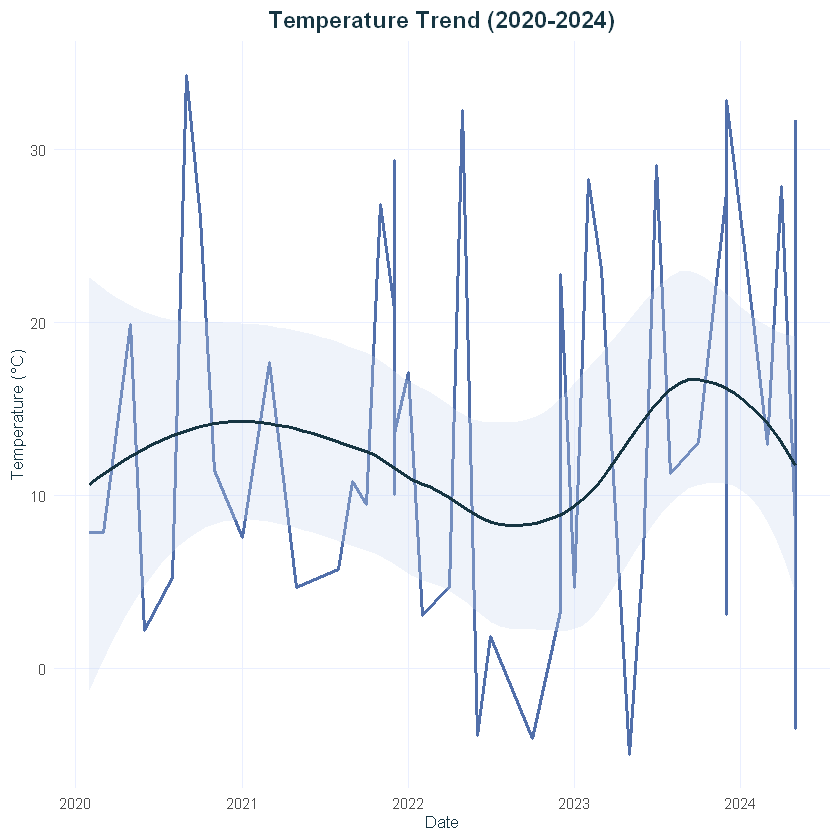

In [ ]:
# Temperature Trend Over Time
p1 <- ggplot(climate_final, aes(x = Date, y = Avg_Temp)) +
  geom_line(color = color1, size = 1) +
  geom_smooth(method = "loess", color = color2, fill = color4, alpha = 0.3) +
  labs(title = "Temperature Trend (2020-2024)", x = "Date", y = "Temperature (°C)") +
  my_theme

print(p1)
ggsave('temp_trend.png', p1, width = 10, height = 6, dpi = 300)

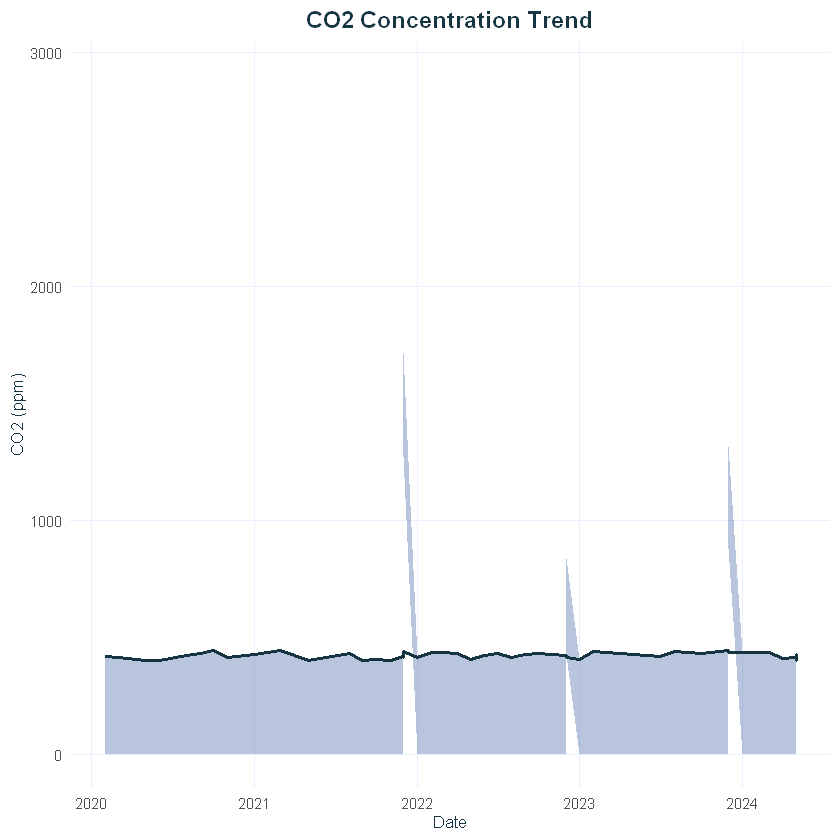

In [ ]:
# CO2 Concentration Trend
p2 <- ggplot(climate_final, aes(x = Date, y = CO2_Concentration)) +
  geom_area(fill = color1, alpha = 0.4) +
  geom_line(color = color2, size = 1) +
  labs(title = "CO2 Concentration Trend", x = "Date", y = "CO2 (ppm)") +
  my_theme

print(p2)
ggsave('co2_trend.png', p2, width = 10, height = 6, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


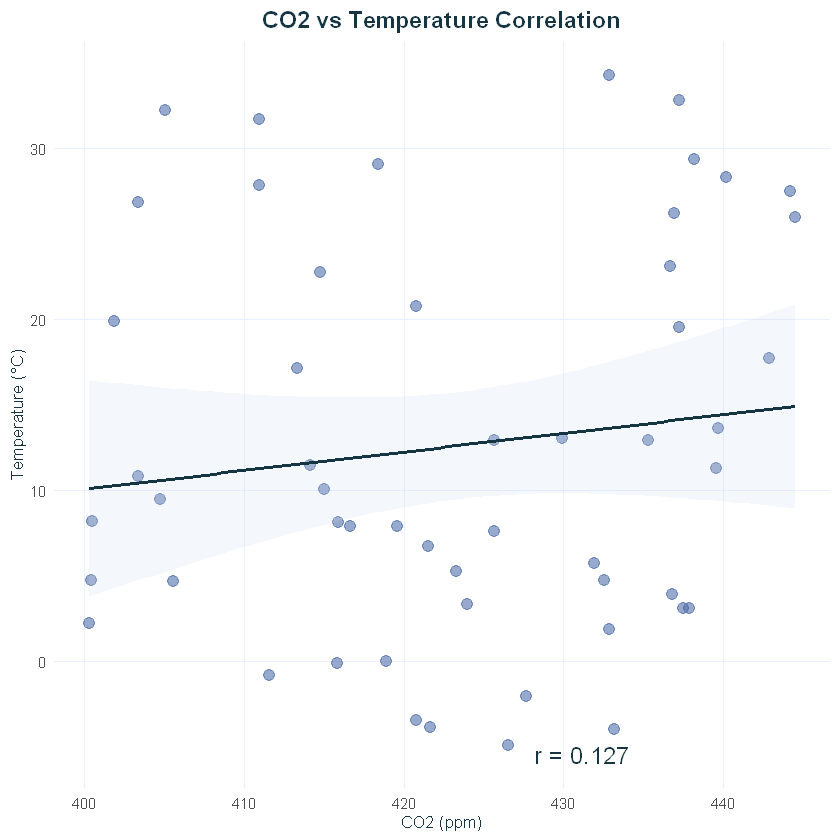

In [ ]:
# CO2 vs Temperature Correlation
cor_value <- cor(climate_final$CO2_Concentration, climate_final$Avg_Temp, use = "complete.obs")

p3 <- ggplot(climate_final, aes(x = CO2_Concentration, y = Avg_Temp)) +
  geom_point(color = color1, size = 3, alpha = 0.6) +
  geom_smooth(method = "lm", color = color2, fill = color4, alpha = 0.2) +
  annotate("text", x = max(climate_final$CO2_Concentration) * 0.97,
           y = min(climate_final$Avg_Temp) * 1.1,
           label = paste("r =", round(cor_value, 3)), size = 5, color = color2) +
  labs(title = "CO2 vs Temperature Correlation", x = "CO2 (ppm)", y = "Temperature (°C)") +
  my_theme

print(p3)
ggsave('co2_temp_scatter.png', p3, width = 10, height = 6, dpi = 300)

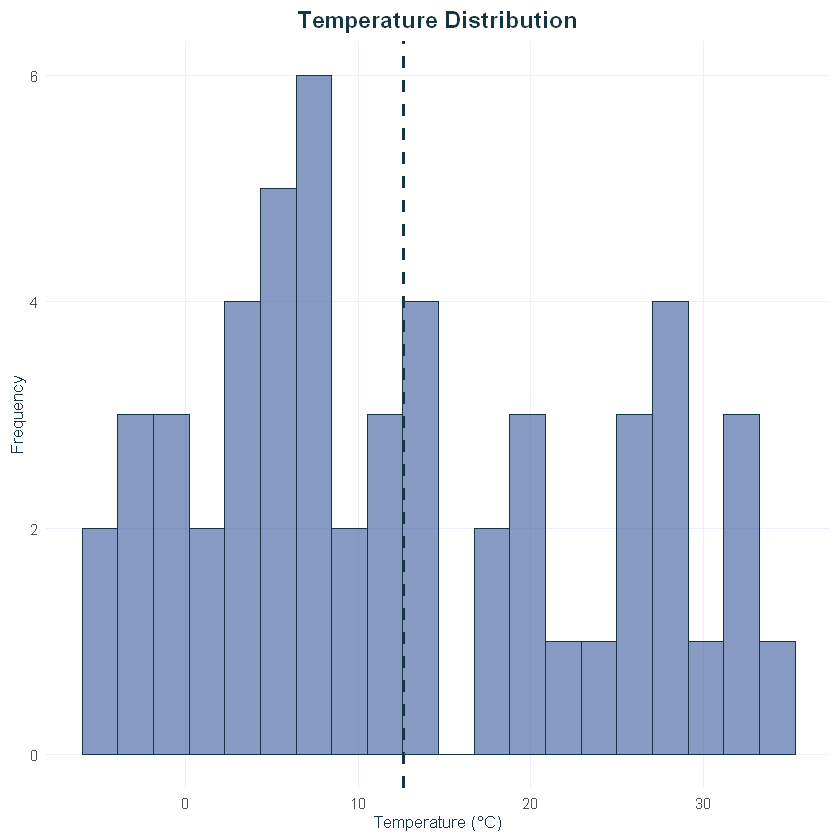

In [ ]:
# Temperature Distribution
p4 <- ggplot(climate_final, aes(x = Avg_Temp)) +
  geom_histogram(bins = 20, fill = color1, color = color2, alpha = 0.7) +
  geom_vline(xintercept = mean(climate_final$Avg_Temp), 
             color = color2, linetype = "dashed", size = 1) +
  labs(title = "Temperature Distribution", x = "Temperature (°C)", y = "Frequency") +
  my_theme

print(p4)
ggsave('temp_distribution.png', p4, width = 10, height = 6, dpi = 300)

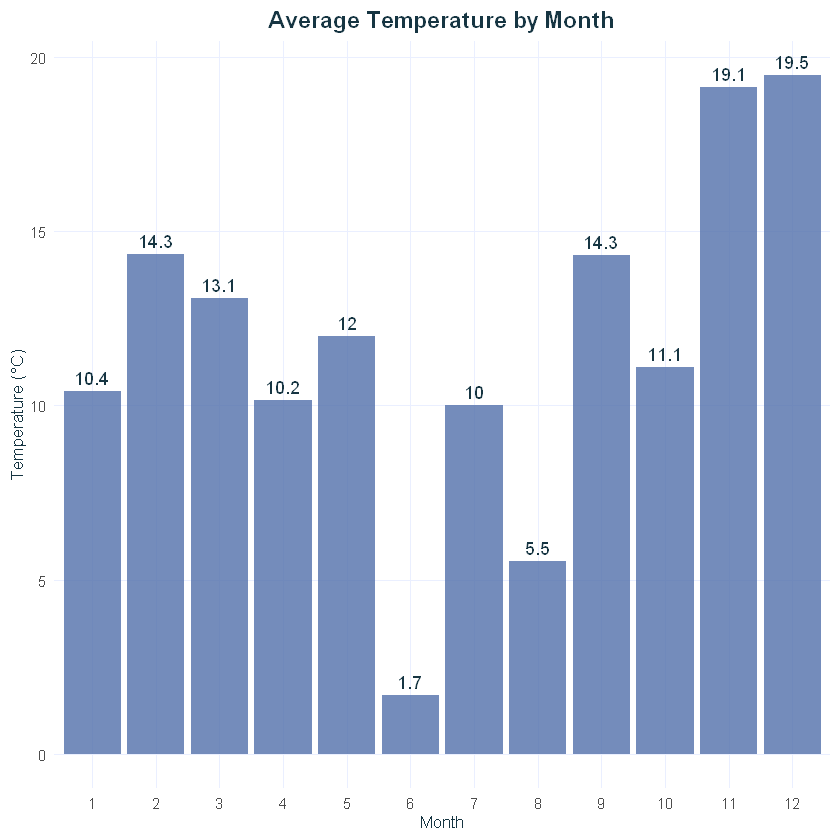

In [ ]:
# Monthly Temperature Analysis
monthly_data <- climate_final %>%
  group_by(Month) %>%
  summarise(Avg_Temp = mean(Avg_Temp, na.rm = TRUE))

p6 <- ggplot(monthly_data, aes(x = factor(Month), y = Avg_Temp)) +
  geom_bar(stat = "identity", fill = color1, alpha = 0.8) +
  geom_text(aes(label = round(Avg_Temp, 1)), vjust = -0.5, color = color2) +
  labs(title = "Average Temperature by Month", x = "Month", y = "Temperature (°C)") +
  my_theme

print(p6)
ggsave('monthly_temp.png', p6, width = 10, height = 6, dpi = 300)

In [ ]:
# Fix Min_Temp Outliers (values > 100 are data entry errors - likely need /100)
cat("🔍 Checking Min_Temp...\n")
min_temp_mean <- mean(climate_final$Min_Temp, na.rm = TRUE)
cat("Min_Temp current mean:", round(min_temp_mean, 2), "\n")

if(min_temp_mean > 100) {
  cat("⚠️ Min_Temp values are unrealistic! Applying fix (divide by 100)...\n")
  climate_final <- climate_final %>%
    mutate(Min_Temp = ifelse(Min_Temp > 100,
                              Min_Temp / 100,
                              Min_Temp))
  cat("✅ Min_Temp fixed! New mean:", round(mean(climate_final$Min_Temp, na.rm = TRUE), 2), "\n")
} else {
  cat("✅ Min_Temp values are logical!\n")
}

🔍 Checking Min_Temp...
Min_Temp current mean: 1893.9 


⚠️ Min_Temp values are unrealistic! Applying fix (divide by 100)...
✅ Min_Temp fixed! New mean: 25.99 


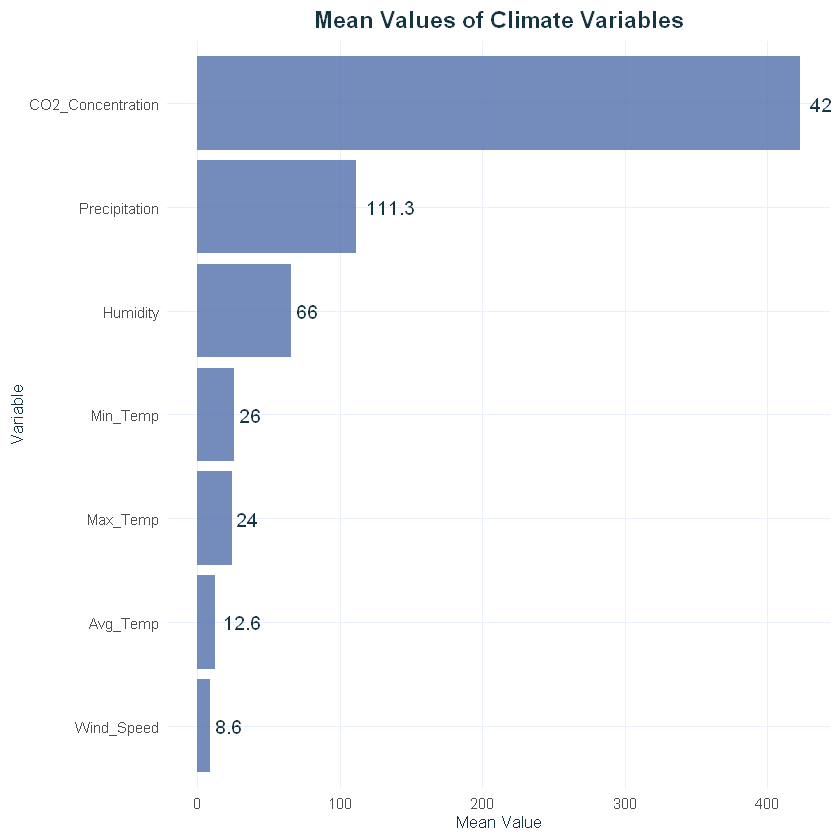

In [ ]:
# Descriptive Statistics
stats_data <- climate_final %>%
  select(Avg_Temp, Max_Temp, Min_Temp, Precipitation, Humidity, Wind_Speed, CO2_Concentration) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Value") %>%
  group_by(Variable) %>%
  summarise(Mean = mean(Value, na.rm = TRUE), Median = median(Value, na.rm = TRUE),
            SD = sd(Value, na.rm = TRUE), Min = min(Value, na.rm = TRUE),
            Max = max(Value, na.rm = TRUE), .groups = 'drop') %>%
  mutate(across(where(is.numeric), ~round(., 2)))

# Mean Values Bar Chart
p_means <- ggplot(stats_data, aes(x = reorder(Variable, Mean), y = Mean)) +
  geom_bar(stat = "identity", fill = color1, alpha = 0.8) +
  geom_text(aes(label = round(Mean, 1)), hjust = -0.2, color = color2, size = 4) +
  coord_flip() +
  labs(title = "Mean Values of Climate Variables", x = "Variable", y = "Mean Value") +
  my_theme

print(p_means)
ggsave('statistics_means.png', p_means, width = 10, height = 6, dpi = 300)

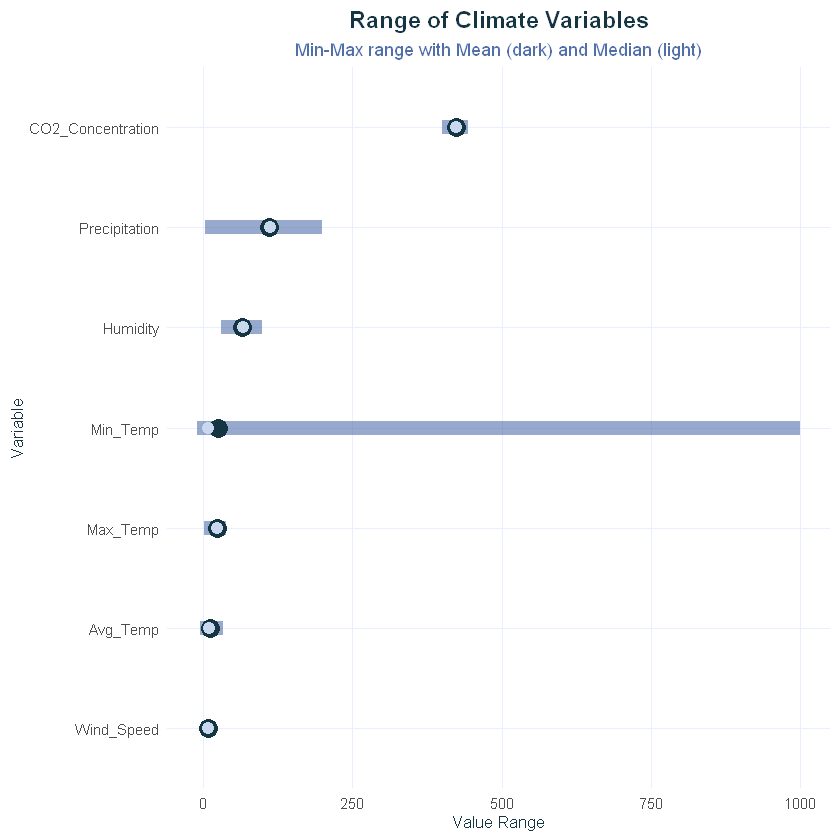

In [ ]:
# Range Plot (Min-Max)
p_range <- ggplot(stats_data, aes(x = reorder(Variable, Mean))) +
  geom_linerange(aes(ymin = Min, ymax = Max), color = color1, linewidth = 4, alpha = 0.6) +
  geom_point(aes(y = Mean), color = color2, size = 5) +
  geom_point(aes(y = Median), color = color4, size = 3) +
  coord_flip() +
  labs(title = "Range of Climate Variables",
       subtitle = "Min-Max range with Mean (dark) and Median (light)",
       x = "Variable", y = "Value Range") +
  my_theme

print(p_range)
ggsave('statistics_range.png', p_range, width = 10, height = 6, dpi = 300)

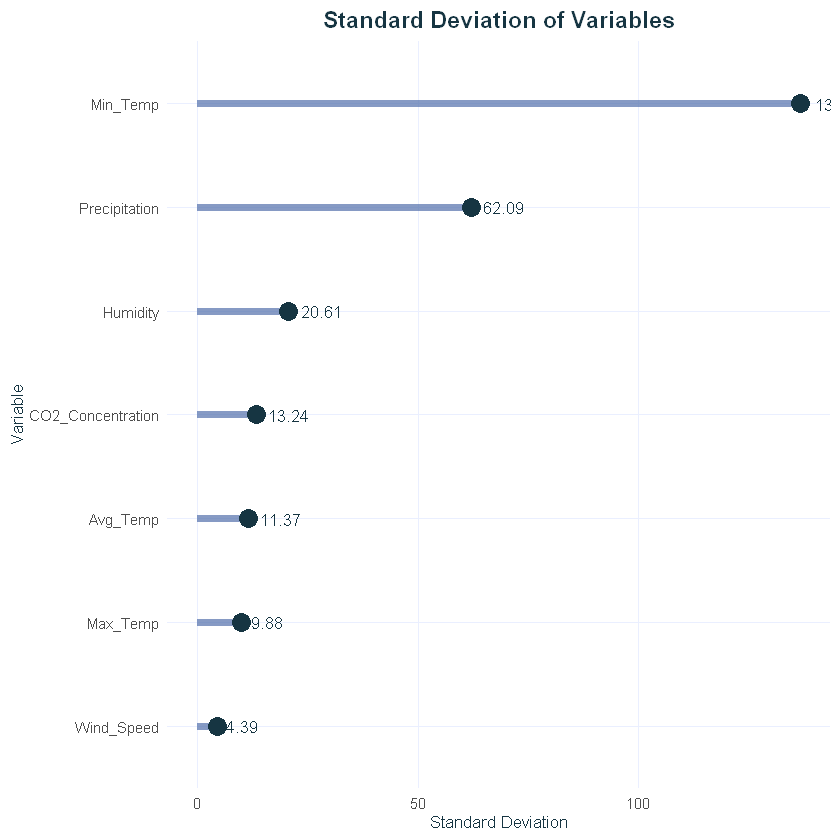

In [ ]:
# Standard Deviation Plot
p_sd <- ggplot(stats_data, aes(x = reorder(Variable, SD), y = SD)) +
  geom_segment(aes(xend = Variable, y = 0, yend = SD), color = color1, linewidth = 2, alpha = 0.7) +
  geom_point(color = color2, size = 5) +
  geom_text(aes(label = round(SD, 2)), hjust = -0.3, color = color2, size = 3.5) +
  coord_flip() +
  labs(title = "Standard Deviation of Variables", x = "Variable", y = "Standard Deviation") +
  my_theme

print(p_sd)
ggsave('statistics_sd.png', p_sd, width = 10, height = 6, dpi = 300)

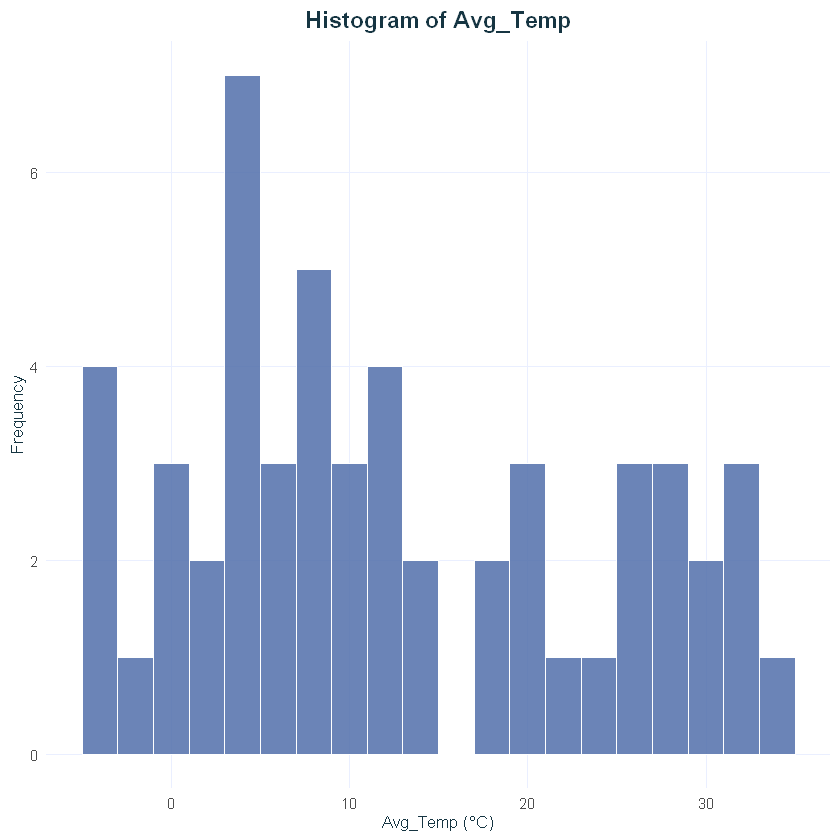

In [ ]:
# Univariate Analysis - Avg_Temp Histogram
p_uni_hist <- ggplot(climate_final, aes(x = Avg_Temp)) +
  geom_histogram(binwidth = 2, fill = color1, color = "white", alpha = 0.85) +
  labs(title = "Histogram of Avg_Temp", x = "Avg_Temp (°C)", y = "Frequency") +
  my_theme

print(p_uni_hist)
ggsave("uni_avg_temp_hist.png", p_uni_hist, width = 8, height = 5, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


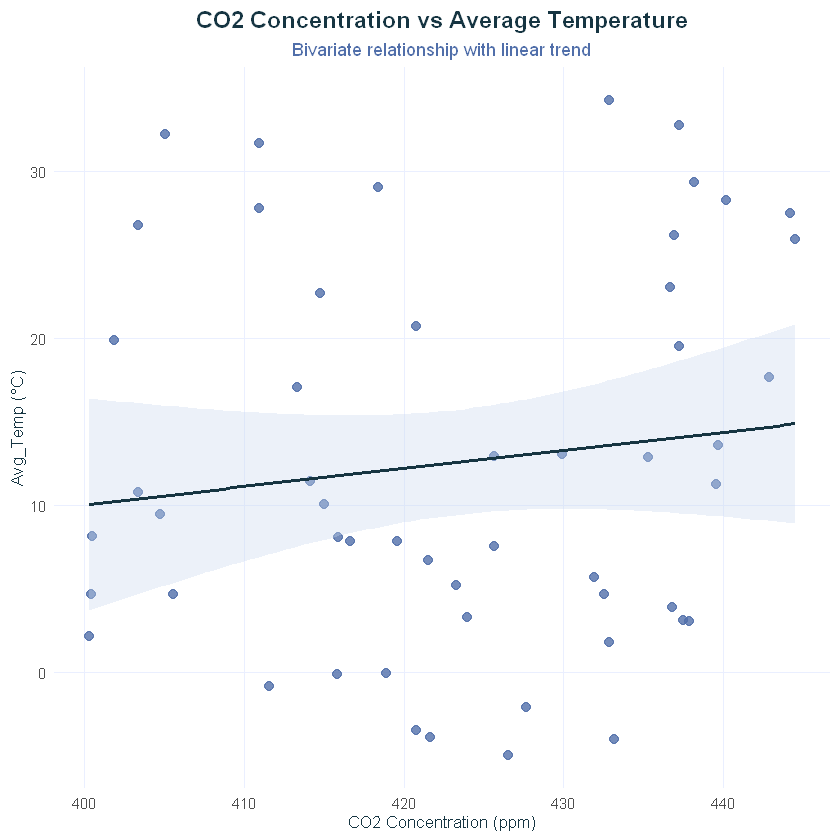

In [ ]:
# Bivariate Analysis - CO2 vs Avg_Temp
p_bi_co2_temp <- ggplot(climate_final, aes(x = CO2_Concentration, y = Avg_Temp)) +
  geom_point(color = color1, alpha = 0.8, size = 2.5) +
  geom_smooth(method = "lm", color = color2, fill = color4, alpha = 0.35) +
  labs(title = "CO2 Concentration vs Average Temperature",
       subtitle = "Bivariate relationship with linear trend",
       x = "CO2 Concentration (ppm)", y = "Avg_Temp (°C)") +
  my_theme

print(p_bi_co2_temp)
ggsave("bi_co2_avgtemp.png", p_bi_co2_temp, width = 8, height = 5, dpi = 300)

## ANOVA & MANOVA Analysis

Statistical hypothesis testing to examine differences in climate variables across seasons and years.

✅ Colors set & Season factor ordered successfully!

📊 1. Running One-Way ANOVA...
            Df Sum Sq Mean Sq F value Pr(>F)
Season       3    720   240.1   1.958  0.133
Residuals   49   6007   122.6               


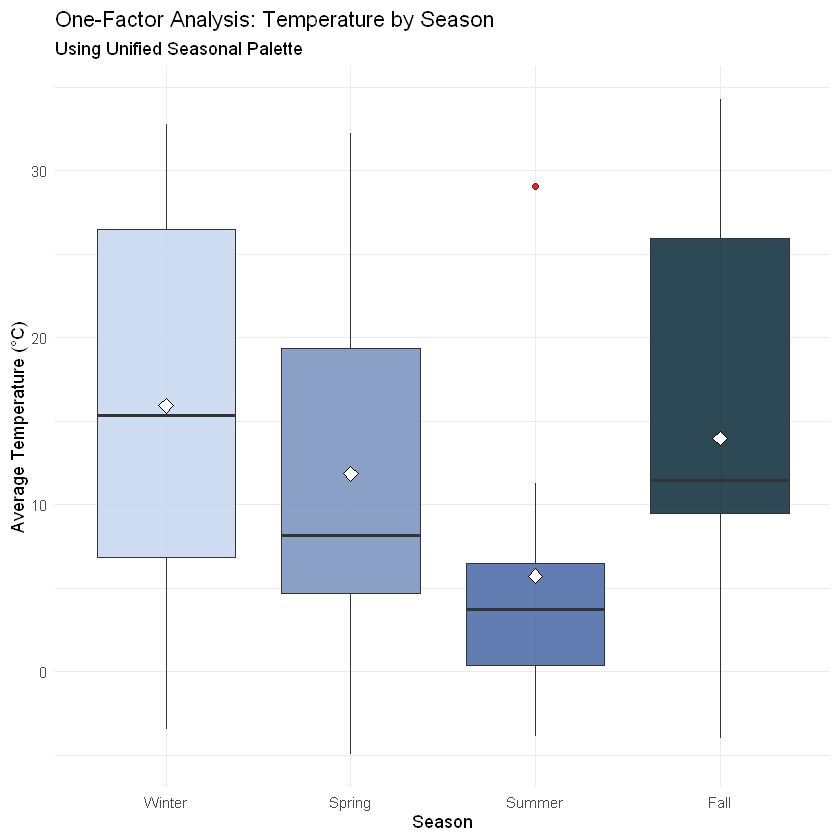

In [ ]:
# =======================================================
# 0. SETUP & DATA PREPARATION
# =======================================================
library(tidyverse)
library(car)
library(reshape2)
library(ggpubr) # عشان نجمع الرسومات لو احتجنا

# 1. تعريف الألوان الموحدة (Unified Color Palette)
anova_colors <- c("Winter" = "#c8d8ef", 
                  "Spring" = "#7d96c1", 
                  "Summer" = "#516faa", 
                  "Fall"   = "#163542")

# 2. التأكد من ترتيب الفصول في الداتا
if(!"Season" %in% names(climate_final)) {
  climate_final <- climate_final %>%
    mutate(Season = case_when(
      Month %in% c(12, 1, 2) ~ "Winter",
      Month %in% c(3, 4, 5) ~ "Spring",
      Month %in% c(6, 7, 8) ~ "Summer",
      Month %in% c(9, 10, 11) ~ "Fall"
    ))
}

# ضبط الترتيب كـ Factor
climate_final$Season <- factor(climate_final$Season, 
                               levels = c("Winter", "Spring", "Summer", "Fall"))

cat("✅ Colors set & Season factor ordered successfully!\n\n")


# =======================================================
# 1. ONE-FACTOR ANALYSIS (One-Way ANOVA)
# =======================================================
cat("📊 1. Running One-Way ANOVA...\n")

anova_model <- aov(Avg_Temp ~ Season, data = climate_final)
print(summary(anova_model))

# الرسم البياني (باستخدام ألوانك)
p1 <- ggplot(climate_final, aes(x = Season, y = Avg_Temp, fill = Season)) +
  geom_boxplot(alpha = 0.9, outlier.shape = 21, outlier.fill = "red") +
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3, fill = "white") +
  
  # هنا ربطنا الرسمة بالألوان بتاعتك
  scale_fill_manual(values = anova_colors) + 
  
  labs(title = "One-Factor Analysis: Temperature by Season",
       subtitle = "Using Unified Seasonal Palette",
       y = "Average Temperature (°C)") +
  theme_minimal() +
  theme(legend.position = "none") # مش محتاجين مفتاح لأن المحور X واضح

print(p1)

In [ ]:
# ============================================
# ANOVA ASSUMPTION CHECKS
# ============================================

cat("🔍 CHECKING ANOVA ASSUMPTIONS\n")
cat("==============================\n\n")

# 1. Normality of Residuals (Shapiro-Wilk test)
residuals_anova <- residuals(anova_temp)
shapiro_test <- shapiro.test(residuals_anova)

cat("1️⃣ Normality Test (Shapiro-Wilk):\n")
cat("   • W =", round(shapiro_test$statistic, 4), "\n")
cat("   • p-value =", round(shapiro_test$p.value, 4), "\n")
cat("   •", ifelse(shapiro_test$p.value > 0.05, 
                   "✅ Residuals are normally distributed", 
                   "⚠️ Residuals deviate from normality"), "\n\n")

# 2. Homogeneity of Variances (Levene's test)
levene_test <- leveneTest(Avg_Temp ~ Season, data = climate_final)

cat("2️⃣ Homogeneity of Variances (Levene's Test):\n")
cat("   • F =", round(levene_test$`F value`[1], 4), "\n")
cat("   • p-value =", round(levene_test$`Pr(>F)`[1], 4), "\n")
cat("   •", ifelse(levene_test$`Pr(>F)`[1] > 0.05, 
                   "✅ Variances are homogeneous", 
                   "⚠️ Variances are heterogeneous"), "\n\n")

# Recommendation
cat("📋 RECOMMENDATION:\n")
if(shapiro_test$p.value < 0.05 | levene_test$`Pr(>F)`[1] < 0.05) {
  cat("• Consider non-parametric alternative (Kruskal-Wallis)\n")
  cat("• Or use Welch's ANOVA for unequal variances\n")
} else {
  cat("• Assumptions met - ANOVA results are valid\n")
}

🔍 CHECKING ANOVA ASSUMPTIONS

1️⃣ Normality Test (Shapiro-Wilk):
   • W = 0.9694 
   • p-value = 0.1892 
   • ✅ Residuals are normally distributed 

2️⃣ Homogeneity of Variances (Levene's Test):
   • F = 0.7543 
   • p-value = 0.5252 
   • ✅ Variances are homogeneous 

📋 RECOMMENDATION:
• Assumptions met - ANOVA results are valid


In [ ]:
# ============================================
# POST-HOC TEST: Tukey HSD
# ============================================

cat("📊 POST-HOC ANALYSIS: Tukey's HSD\n")
cat("==================================\n\n")

# Run Tukey HSD test
tukey_results <- TukeyHSD(anova_temp)

cat("Pairwise Comparisons (Season):\n")
print(tukey_results)

# Extract significant differences
tukey_df <- as.data.frame(tukey_results$Season)
tukey_df$Comparison <- rownames(tukey_df)
tukey_df$Significant <- ifelse(tukey_df$`p adj` < 0.05, "Yes", "No")

cat("\n📋 Significant Differences (p < 0.05):\n")
sig_pairs <- tukey_df[tukey_df$Significant == "Yes", ]
if(nrow(sig_pairs) > 0) {
  for(i in 1:nrow(sig_pairs)) {
    cat("• ", sig_pairs$Comparison[i], ": diff =", round(sig_pairs$diff[i], 2), 
        ", p =", round(sig_pairs$`p adj`[i], 4), "\n")
  }
} else {
  cat("• No significant pairwise differences found\n")
}

📊 POST-HOC ANALYSIS: Tukey's HSD

Pairwise Comparisons (Season):
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Avg_Temp ~ Season, data = climate_final)

$Season
                    diff        lwr       upr     p adj
Spring-Winter  -4.072095 -14.333175  6.188985 0.7178846
Summer-Winter -10.214151 -21.618704  1.190402 0.0940598
Fall-Winter    -1.965826 -13.785225  9.853572 0.9707846
Summer-Spring  -6.142056 -18.334036  6.049923 0.5425811
Fall-Spring     2.106268 -10.474619 14.687156 0.9702333
Fall-Summer     8.248325  -5.281375 21.778025 0.3763808


📋 Significant Differences (p < 0.05):
• No significant pairwise differences found


✅ Saved: anova_tukey_hsd.png


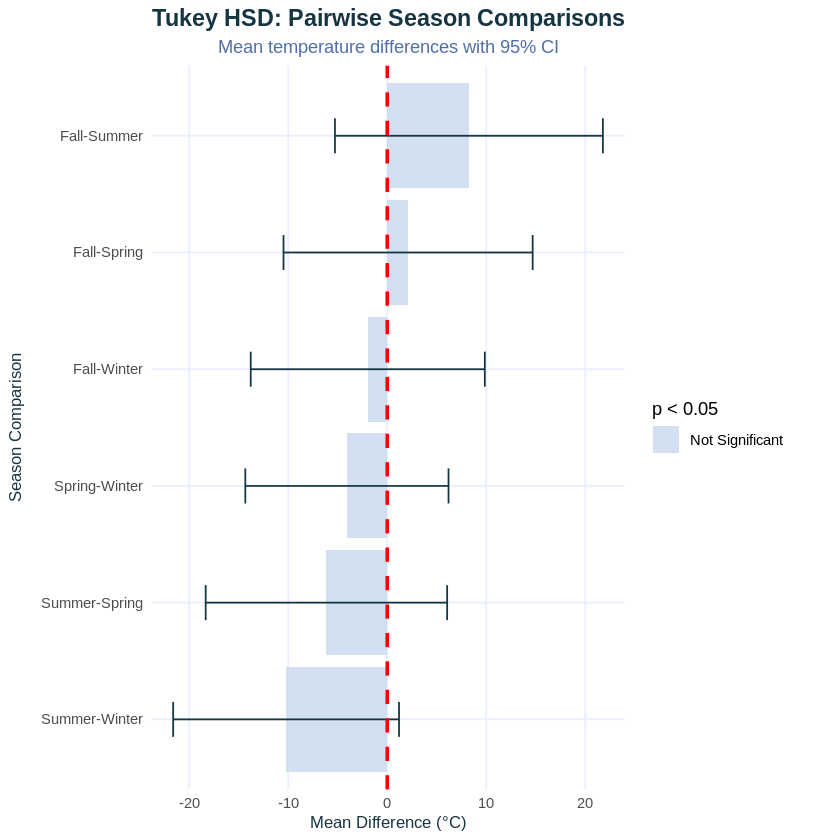

In [ ]:
# ============================================
# TUKEY HSD VISUALIZATION
# ============================================

# Prepare Tukey data for plotting
tukey_plot_data <- as.data.frame(tukey_results$Season)
tukey_plot_data$Comparison <- rownames(tukey_plot_data)
tukey_plot_data$Significant <- factor(ifelse(tukey_plot_data$`p adj` < 0.05, "Significant", "Not Significant"))

p_tukey <- ggplot(tukey_plot_data, aes(x = reorder(Comparison, diff), y = diff, fill = Significant)) +
  geom_bar(stat = "identity", alpha = 0.8) +
  geom_errorbar(aes(ymin = lwr, ymax = upr), width = 0.3, color = color2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red", linewidth = 1) +
  scale_fill_manual(values = c("Significant" = color1, "Not Significant" = color4)) +
  coord_flip() +
  labs(
    title = "Tukey HSD: Pairwise Season Comparisons",
    subtitle = "Mean temperature differences with 95% CI",
    x = "Season Comparison",
    y = "Mean Difference (°C)",
    fill = "p < 0.05"
  ) +
  my_theme

print(p_tukey)
ggsave("anova_tukey_hsd.png", p_tukey, width = 10, height = 6, dpi = 300)
cat("✅ Saved: anova_tukey_hsd.png\n")

In [ ]:
# ============================================
# TWO-WAY ANOVA: Season × Year Interaction
# ============================================

cat("📈 TWO-WAY ANOVA: Season × Year Interaction\n")
cat("=============================================\n\n")

# Run Two-Way ANOVA
two_way_anova <- aov(Avg_Temp ~ Season * Year_Factor, data = climate_final)
two_way_summary <- summary(two_way_anova)

cat("Two-Way ANOVA Results:\n")
print(two_way_summary)

# Extract effects
cat("\n📊 Effect Summary:\n")
cat("• Season effect: F =", round(two_way_summary[[1]]$"F value"[1], 2),
    ", p =", round(two_way_summary[[1]]$"Pr(>F)"[1], 4),
    ifelse(two_way_summary[[1]]$"Pr(>F)"[1] < 0.05, " ✅", " ❌"), "\n")

cat("• Year effect: F =", round(two_way_summary[[1]]$"F value"[2], 2),
    ", p =", round(two_way_summary[[1]]$"Pr(>F)"[2], 4),
    ifelse(two_way_summary[[1]]$"Pr(>F)"[2] < 0.05, " ✅", " ❌"), "\n")

cat("• Season×Year interaction: F =", round(two_way_summary[[1]]$"F value"[3], 2),
    ", p =", round(two_way_summary[[1]]$"Pr(>F)"[3], 4),
    ifelse(two_way_summary[[1]]$"Pr(>F)"[3] < 0.05, " ✅", " ❌"), "\n")

📈 TWO-WAY ANOVA: Season × Year Interaction

Two-Way ANOVA Results:
                   Df Sum Sq Mean Sq F value Pr(>F)
Season              3    720  240.05   1.852  0.156
Year_Factor         4    568  141.97   1.095  0.375
Season:Year_Factor 11   1032   93.84   0.724  0.708
Residuals          34   4407  129.62               

📊 Effect Summary:
• Season effect: F = 1.85 , p = 0.1564  ❌ 
• Year effect: F = 1.1 , p = 0.3746  ❌ 
• Season×Year interaction: F = 0.72 , p = 0.708  ❌ 


✅ Saved: anova_interaction_plot.png


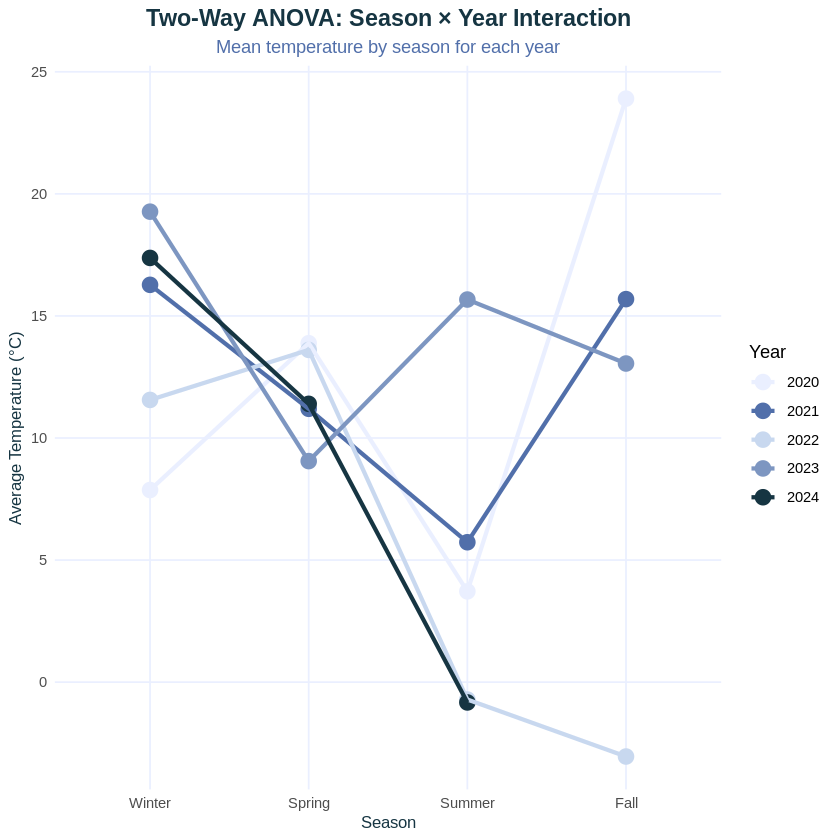

In [ ]:
# ============================================
# TWO-WAY ANOVA: Interaction Plot
# ============================================

year_colors <- c("#eaefff", "#516faa", "#c8d8ef", "#7d96c1", "#163542")

p_interaction <- ggplot(climate_final, aes(x = Season, y = Avg_Temp, 
                                            color = Year_Factor, group = Year_Factor)) +
  stat_summary(fun = mean, geom = "point", size = 4) +
  stat_summary(fun = mean, geom = "line", linewidth = 1.2) +
  scale_color_manual(values = year_colors) +
  labs(
    title = "Two-Way ANOVA: Season × Year Interaction",
    subtitle = "Mean temperature by season for each year",
    x = "Season",
    y = "Average Temperature (°C)",
    color = "Year"
  ) +
  my_theme +
  theme(legend.position = "right")

print(p_interaction)
ggsave("anova_interaction_plot.png", p_interaction, width = 10, height = 6, dpi = 300)
cat("✅ Saved: anova_interaction_plot.png\n")


📊 3. Running One-Vector Analysis...
T2 Statistic: 13.43 | P-value: 0.008902 


<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    get_transformation: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: function
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    minor_breaks: waiver
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: grey50
    name: waiver
    palette: function
    palette.cache: NULL
    position: left
    range: environment
    rescale: function
    reset: function
    train: function
    train_df: function
    transform: function
    transform_df: function
    super:  <ggproto object: Class ScaleDiscrete, Scale, gg>

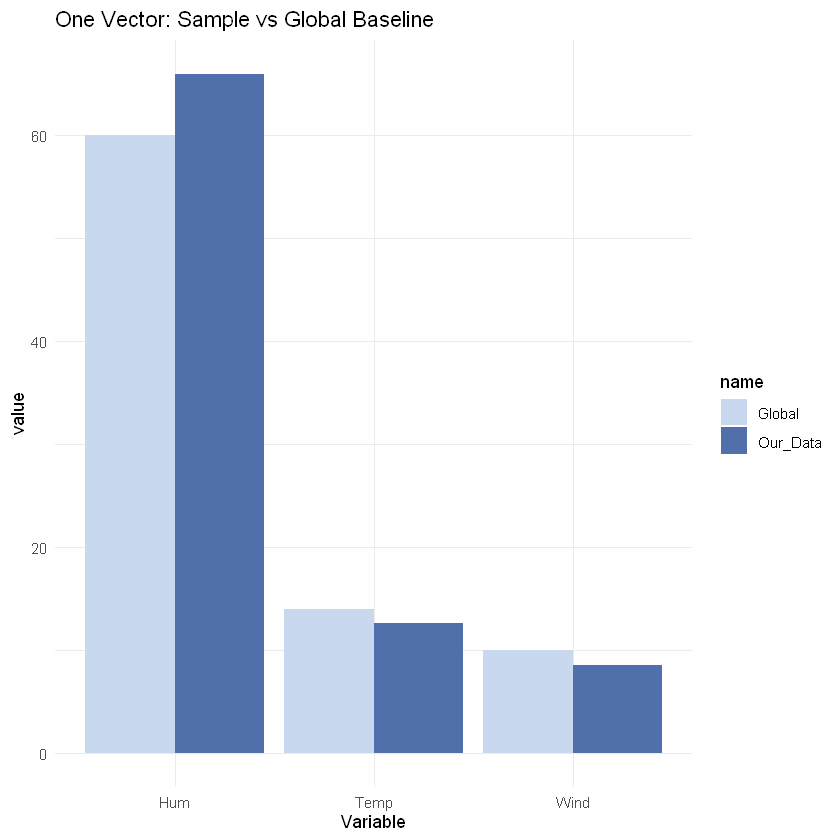

In [ ]:
# =======================================================
# 3. ONE VECTOR ANALYSIS (Global Comparison)
# =======================================================
cat("\n📊 3. Running One-Vector Analysis...\n")
# (الكود الإحصائي زي ما هو...)
X_vector <- climate_final %>% select(Avg_Temp, Humidity, Wind_Speed) %>% na.omit()
mu0 <- c(14, 60, 10) 
n <- nrow(X_vector); p <- ncol(X_vector); x_bar <- colMeans(X_vector)
S_inv <- solve(cov(X_vector)); diff <- x_bar - mu0
T2 <- n * (t(diff) %*% S_inv %*% diff)
F_stat <- ((n - p) / (p * (n - 1))) * as.numeric(T2)
p_val_vector <- 1 - pf(F_stat, df1 = p, df2 = n - p)

cat("T2 Statistic:", round(T2, 2), "| P-value:", format.pval(p_val_vector, digits=4), "\n")

# الرسم البياني (مقارنة أعمدة)
comp_data <- data.frame(Variable = c("Temp", "Hum", "Wind"), Our_Data = as.numeric(x_bar), Global = mu0) %>%
  pivot_longer(cols = c("Our_Data", "Global"))

scale_fill_manual(values = c(
"Global" = color4,
"Our_Data" = color1
))

p3 <- ggplot(comp_data, aes(x = Variable, y = value, fill = name)) +
geom_bar(stat="identity", position="dodge") +
scale_fill_manual(values = c(
"Global" = color4,
"Our_Data" = color1
)) +
labs(title = "One Vector: Sample vs Global Baseline") +
theme_minimal()

print(p3)

In [ ]:
# ============================================
# MANOVA: Multiple Dependent Variables
# ============================================

cat("📊 MANOVA: Multivariate Analysis of Variance\n")
cat("=============================================\n\n")

# Select dependent variables for MANOVA
# Testing effect of Season on 3 distinct climate dimensions:
# - Temperature (Avg_Temp)
# - Humidity
# - Wind Speed
# Note: Excluded Max_Temp and Min_Temp as they are highly correlated with Avg_Temp

manova_data <- climate_final %>%
  select(Season, Avg_Temp, Humidity, Wind_Speed) %>%
  na.omit()

# Create response matrix
Y <- cbind(manova_data$Avg_Temp, manova_data$Humidity, manova_data$Wind_Speed)
colnames(Y) <- c("Avg_Temp", "Humidity", "Wind_Speed")

# Run MANOVA
manova_model <- manova(Y ~ Season, data = manova_data)
manova_result <- manova_model  # Create alias for summary report
manova_summary <- summary(manova_model)

cat("MANOVA Results (Pillai's Trace):\n")
print(manova_summary)

# Additional test statistics
cat("\n📊 All Test Statistics:\n")
print(summary(manova_model, test = "Wilks"))
print(summary(manova_model, test = "Hotelling-Lawley"))
print(summary(manova_model, test = "Roy"))

📊 MANOVA: Multivariate Analysis of Variance

MANOVA Results (Pillai's Trace):
          Df  Pillai approx F num Df den Df Pr(>F)
Season     3 0.20204   1.1794      9    147 0.3123
Residuals 49                                      

📊 All Test Statistics:
          Df   Wilks approx F num Df den Df Pr(>F)
Season     3 0.80465   1.1889      9 114.54 0.3088
Residuals 49                                      
          Df Hotelling-Lawley approx F num Df den Df Pr(>F)
Season     3          0.23447   1.1897      9    137 0.3063
Residuals 49                                               
          Df     Roy approx F num Df den Df Pr(>F)  
Season     3 0.19103   3.1202      3     49 0.0343 *
Residuals 49                                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


✅ Saved: manova_boxplots.png


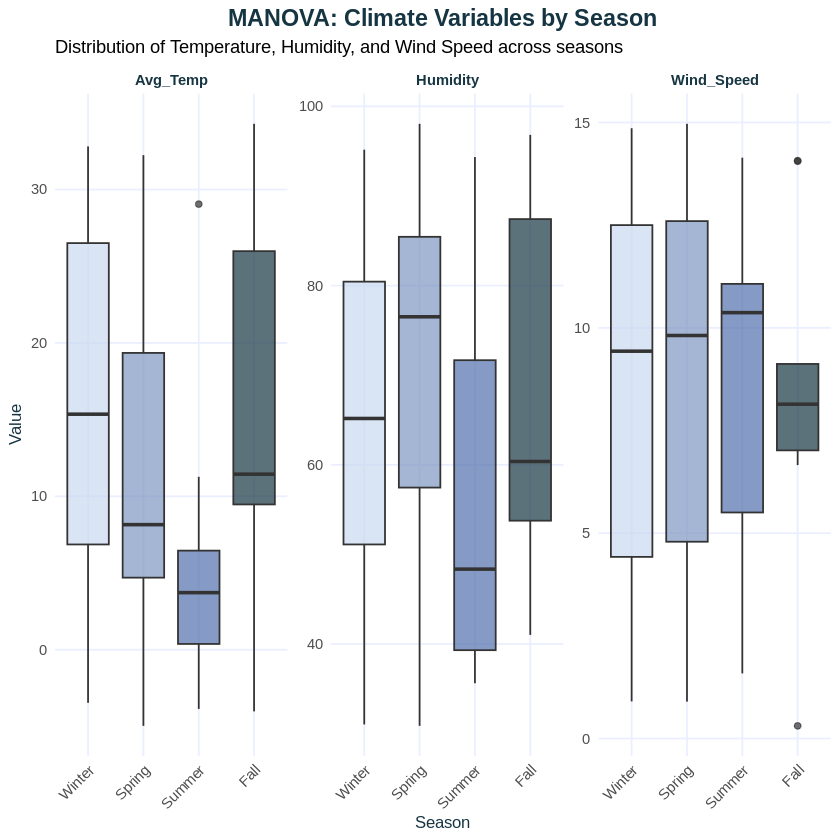

In [ ]:
# ============================================
# MANOVA VISUALIZATION: Multi-Variable Boxplots
# ============================================

# Prepare data for visualization
manova_plot_data <- manova_data %>%
  pivot_longer(cols = c(Avg_Temp, Humidity, Wind_Speed),
               names_to = "Variable",
               values_to = "Value")

p_manova <- ggplot(manova_plot_data, aes(x = Season, y = Value, fill = Season)) +
  geom_boxplot(alpha = 0.7) +
  facet_wrap(~Variable, scales = "free_y", ncol = 3) +
  scale_fill_manual(values = anova_colors) +
  labs(
    title = "MANOVA: Climate Variables by Season",
    subtitle = "Distribution of Temperature, Humidity, and Wind Speed across seasons",
    x = "Season",
    y = "Value"
  ) +
  my_theme +
  theme(
    legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

print(p_manova)
ggsave("manova_boxplots.png", p_manova, width = 12, height = 6, dpi = 300)
cat("✅ Saved: manova_boxplots.png\n")

In [ ]:
# Multiple Linear Regression Models
model1 <- lm(Avg_Temp ~ CO2_Concentration + Humidity + Wind_Speed + Precipitation, 
             data = climate_final)

model2 <- lm(Avg_Temp ~ CO2_Concentration + Humidity + Wind_Speed + Precipitation + 
             Solar_Irradiance + Cloud_Cover + Sea_Surface_Temp, data = climate_final)

model3 <- lm(Avg_Temp ~ CO2_Concentration + Humidity + Wind_Speed + Precipitation + 
             Solar_Irradiance + Cloud_Cover + Sea_Surface_Temp + ENSO_Index + 
             Particulate_Matter + Vegetation_Index, data = climate_final)

cat("Model 2: R² =", round(summary(model2)$r.squared, 3), 
    "| AIC =", round(AIC(model2), 0), "\n")

Model 2: R² = 0.204 | AIC = 413 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


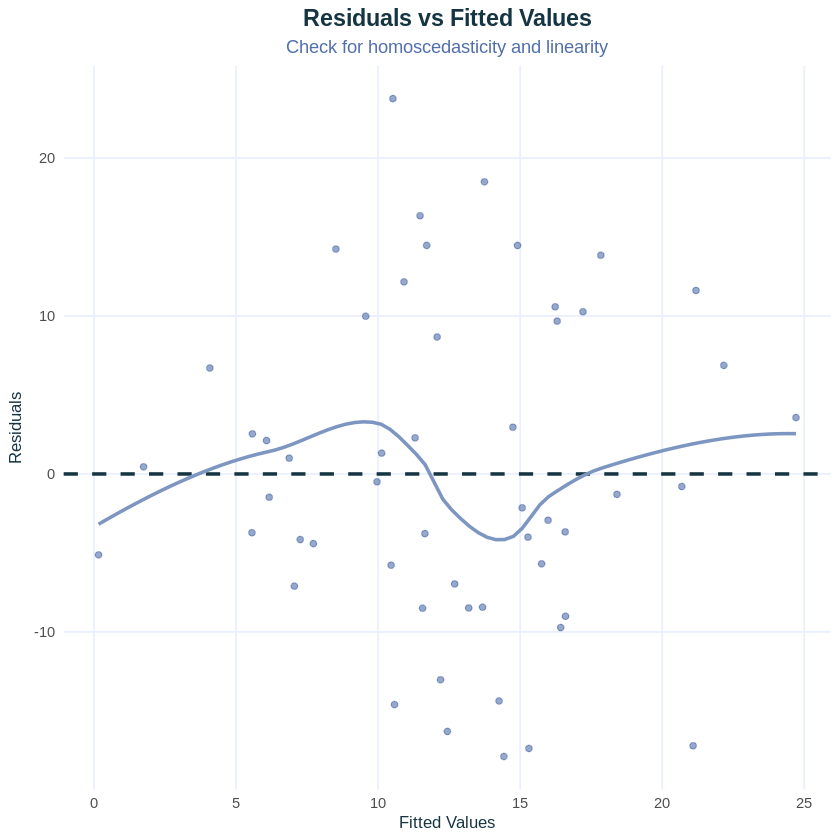

In [ ]:
# Regression Diagnostic Plot 1: Residuals vs Fitted
climate_final$fitted <- fitted(model2)
climate_final$residuals <- residuals(model2)

p_resid_fitted <- ggplot(climate_final, aes(x = fitted, y = residuals)) +
  geom_point(color = color1, alpha = 0.6) +
  geom_hline(yintercept = 0, color = color2, linetype = "dashed", size = 1) +
  geom_smooth(method = "loess", color = color5, se = FALSE) +
  labs(title = "Residuals vs Fitted Values",
       subtitle = "Check for homoscedasticity and linearity",
       x = "Fitted Values", y = "Residuals") +
  my_theme

print(p_resid_fitted)
ggsave("regression_residuals_fitted.png", p_resid_fitted, width = 10, height = 6, dpi = 300)

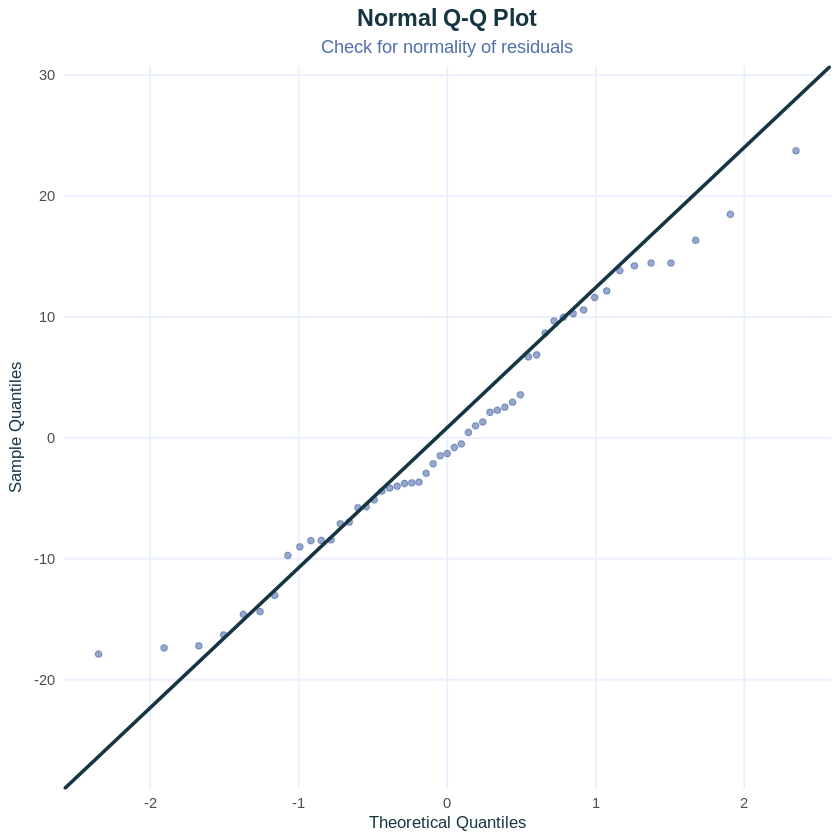

In [ ]:
# Regression Diagnostic Plot 2: Normal Q-Q Plot
p_qq <- ggplot(climate_final, aes(sample = residuals)) +
  stat_qq(color = color1, alpha = 0.6) +
  stat_qq_line(color = color2, size = 1) +
  labs(title = "Normal Q-Q Plot",
       subtitle = "Check for normality of residuals",
       x = "Theoretical Quantiles", y = "Sample Quantiles") +
  my_theme

print(p_qq)
ggsave("regression_qq_plot.png", p_qq, width = 10, height = 6, dpi = 300)

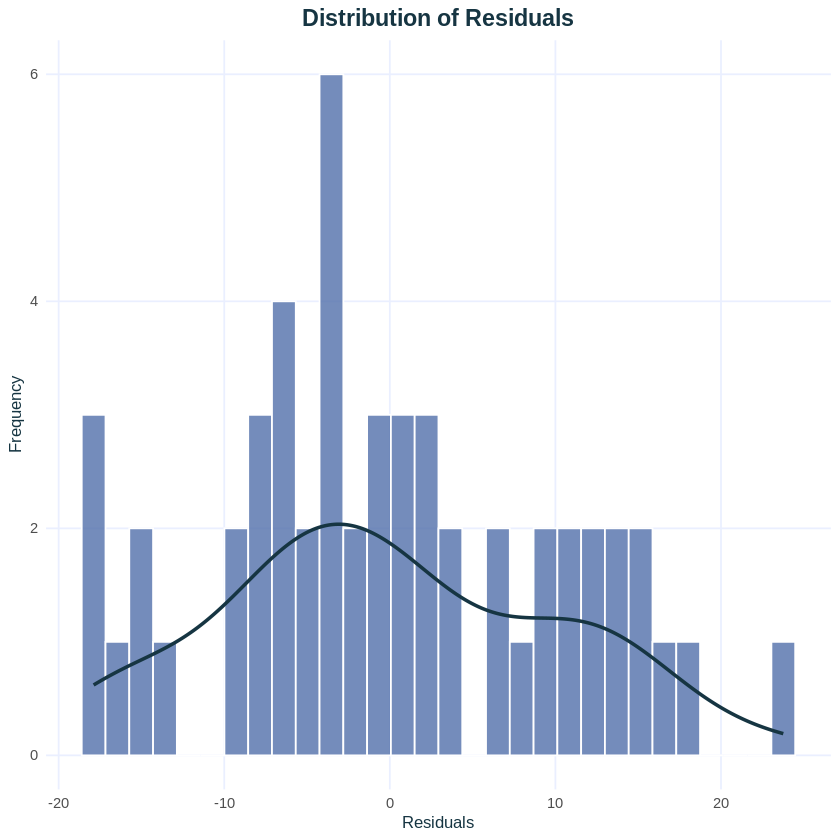

In [ ]:
# Regression Diagnostic Plot 3: Histogram of Residuals
p_resid_hist <- ggplot(climate_final, aes(x = residuals)) +
  geom_histogram(bins = 30, fill = color1, color = "white", alpha = 0.8) +
  geom_density(aes(y = after_stat(count)), color = color2, size = 1) +
  labs(title = "Distribution of Residuals", x = "Residuals", y = "Frequency") +
  my_theme

print(p_resid_hist)
ggsave("regression_residuals_hist.png", p_resid_hist, width = 10, height = 6, dpi = 300)

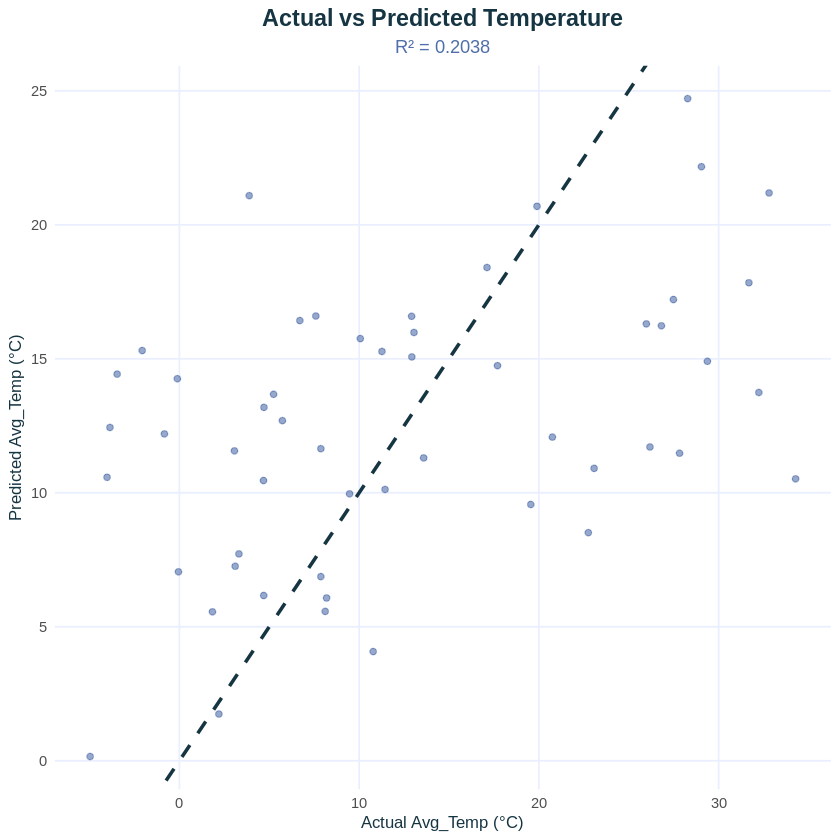

In [ ]:
# Regression Diagnostic Plot 4: Actual vs Predicted
p_actual_pred <- ggplot(climate_final, aes(x = Avg_Temp, y = fitted)) +
  geom_point(color = color1, alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, color = color2, linetype = "dashed", size = 1) +
  labs(title = "Actual vs Predicted Temperature",
       subtitle = paste("R² =", round(summary(model2)$r.squared, 4)),
       x = "Actual Avg_Temp (°C)", y = "Predicted Avg_Temp (°C)") +
  my_theme

print(p_actual_pred)
ggsave("regression_actual_vs_predicted.png", p_actual_pred, width = 10, height = 6, dpi = 300)

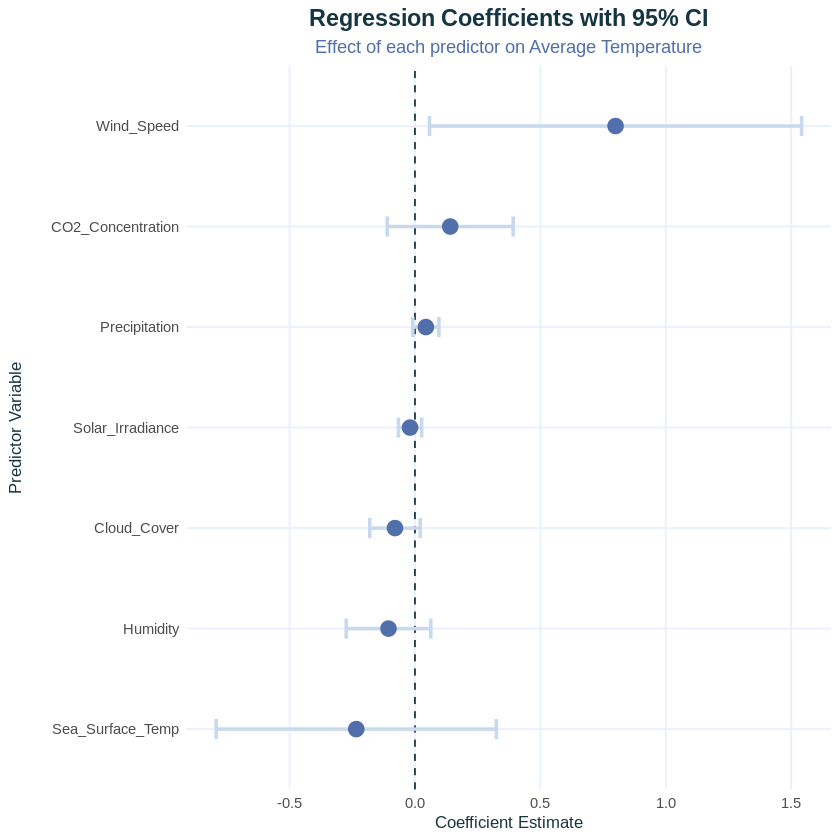

In [ ]:
# Coefficient Visualization
coef_data <- data.frame(
  Variable = names(coef(model2))[-1],
  Coefficient = coef(model2)[-1],
  CI_Lower = confint(model2)[-1, 1],
  CI_Upper = confint(model2)[-1, 2]
) %>% arrange(Coefficient)

p_coef <- ggplot(coef_data, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_hline(yintercept = 0, color = color2, linetype = "dashed") +
  geom_errorbar(aes(ymin = CI_Lower, ymax = CI_Upper), width = 0.2, color = color4, size = 1) +
  geom_point(color = color1, size = 4) +
  coord_flip() +
  labs(title = "Regression Coefficients with 95% CI",
       subtitle = "Effect of each predictor on Average Temperature",
       x = "Predictor Variable", y = "Coefficient Estimate") +
  my_theme

print(p_coef)
ggsave("regression_coefficients.png", p_coef, width = 10, height = 6, dpi = 300)

## 3. Statistical Analysis & Modeling

In [ ]:
# Multivariate Regression - Separate Models for Each Temperature Type
model_avg <- lm(Avg_Temp ~ CO2_Concentration + Humidity + Wind_Speed + 
                Precipitation + Solar_Irradiance + Cloud_Cover + Sea_Surface_Temp, 
                data = climate_final)

model_max <- lm(Max_Temp ~ CO2_Concentration + Humidity + Wind_Speed + 
                Precipitation + Solar_Irradiance + Cloud_Cover + Sea_Surface_Temp, 
                data = climate_final)

model_min <- lm(Min_Temp ~ CO2_Concentration + Humidity + Wind_Speed + 
                Precipitation + Solar_Irradiance + Cloud_Cover + Sea_Surface_Temp, 
                data = climate_final)

comparison_df <- data.frame(
  Model = c("Avg_Temp", "Max_Temp", "Min_Temp"),
  R_squared = c(summary(model_avg)$r.squared, summary(model_max)$r.squared, summary(model_min)$r.squared),
  Adj_R_squared = c(summary(model_avg)$adj.r.squared, summary(model_max)$adj.r.squared, summary(model_min)$adj.r.squared),
  AIC = c(AIC(model_avg), AIC(model_max), AIC(model_min)),
  BIC = c(BIC(model_avg), BIC(model_max), BIC(model_min))
)

cat("Multivariate: Avg R² =", round(mean(comparison_df$R_squared), 3), "\n")

Multivariate: Avg R² = 0.188 


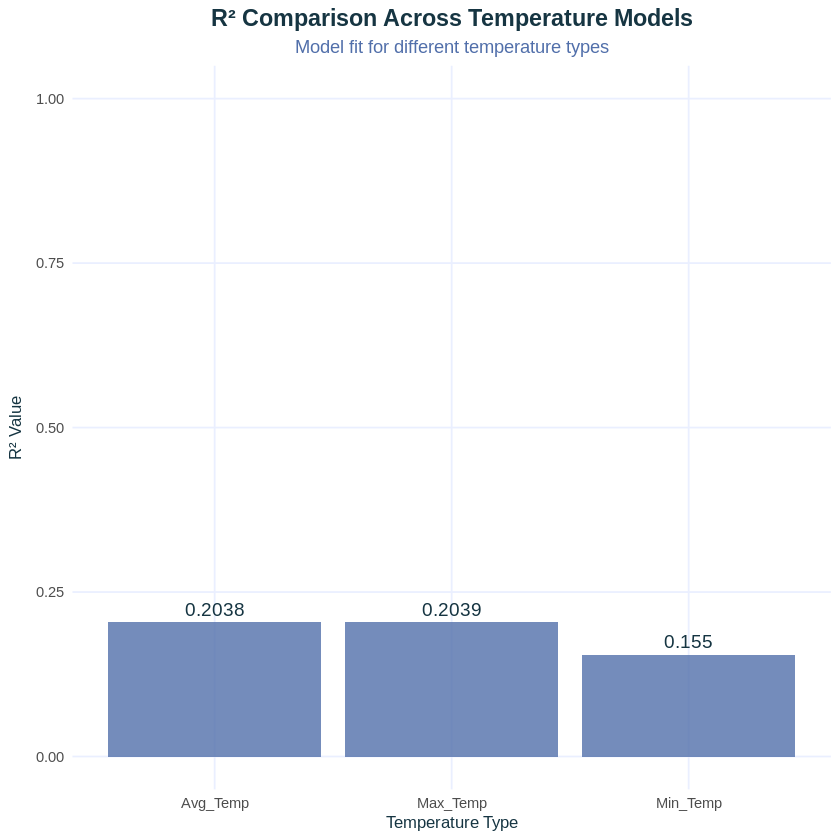

In [ ]:
# Multivariate Visualization 1: R² Comparison
climate_final$pred_avg <- predict(model_avg)
climate_final$pred_max <- predict(model_max)
climate_final$pred_min <- predict(model_min)

p_r2 <- ggplot(comparison_df, aes(x = Model, y = R_squared)) +
  geom_bar(stat = "identity", fill = color1, alpha = 0.8) +
  geom_text(aes(label = round(R_squared, 4)), vjust = -0.5, color = color2, size = 4) +
  ylim(0, 1) +
  labs(title = "R² Comparison Across Temperature Models",
       subtitle = "Model fit for different temperature types",
       x = "Temperature Type", y = "R² Value") +
  my_theme

print(p_r2)
ggsave("multivar_r2_comparison.png", p_r2, width = 10, height = 6, dpi = 300)

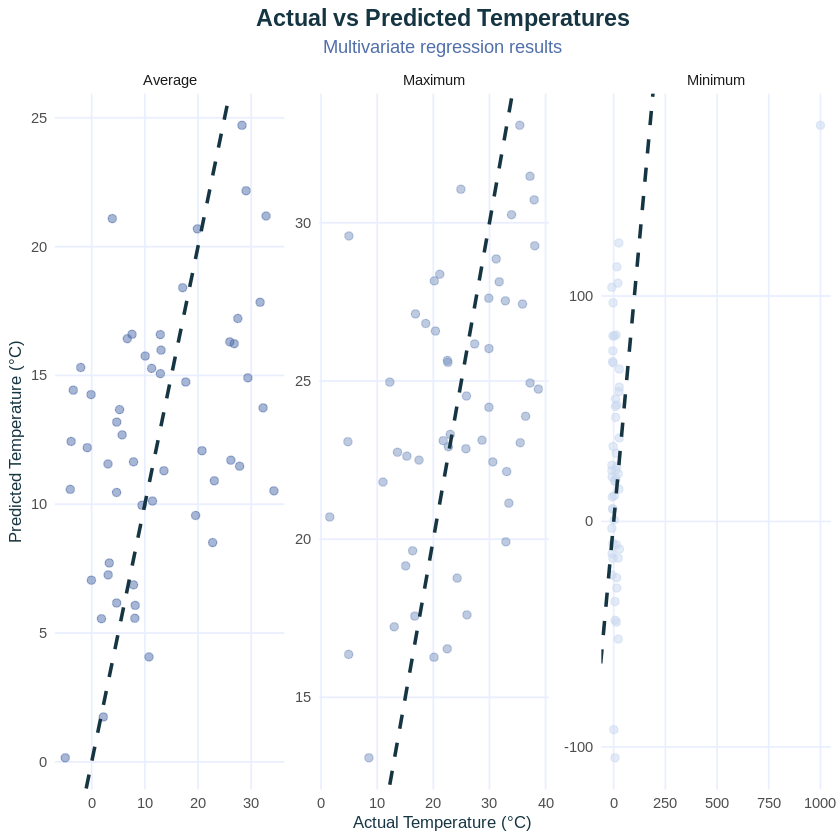

In [ ]:
# Multivariate Visualization 2: Actual vs Predicted for All Models
temp_long <- data.frame(
  Actual = c(climate_final$Avg_Temp, climate_final$Max_Temp, climate_final$Min_Temp),
  Predicted = c(climate_final$pred_avg, climate_final$pred_max, climate_final$pred_min),
  Type = rep(c("Average", "Maximum", "Minimum"), each = nrow(climate_final))
)

p_multivar_pred <- ggplot(temp_long, aes(x = Actual, y = Predicted, color = Type)) +
  geom_point(alpha = 0.5, size = 2) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = color2, size = 1) +
  scale_color_manual(values = c("Average" = color1, "Maximum" = color5, "Minimum" = color4)) +
  facet_wrap(~Type, scales = "free") +
  labs(title = "Actual vs Predicted Temperatures",
       subtitle = "Multivariate regression results",
       x = "Actual Temperature (°C)", y = "Predicted Temperature (°C)") +
  my_theme +
  theme(legend.position = "none")

print(p_multivar_pred)
ggsave("multivar_actual_vs_pred.png", p_multivar_pred, width = 12, height = 5, dpi = 300)

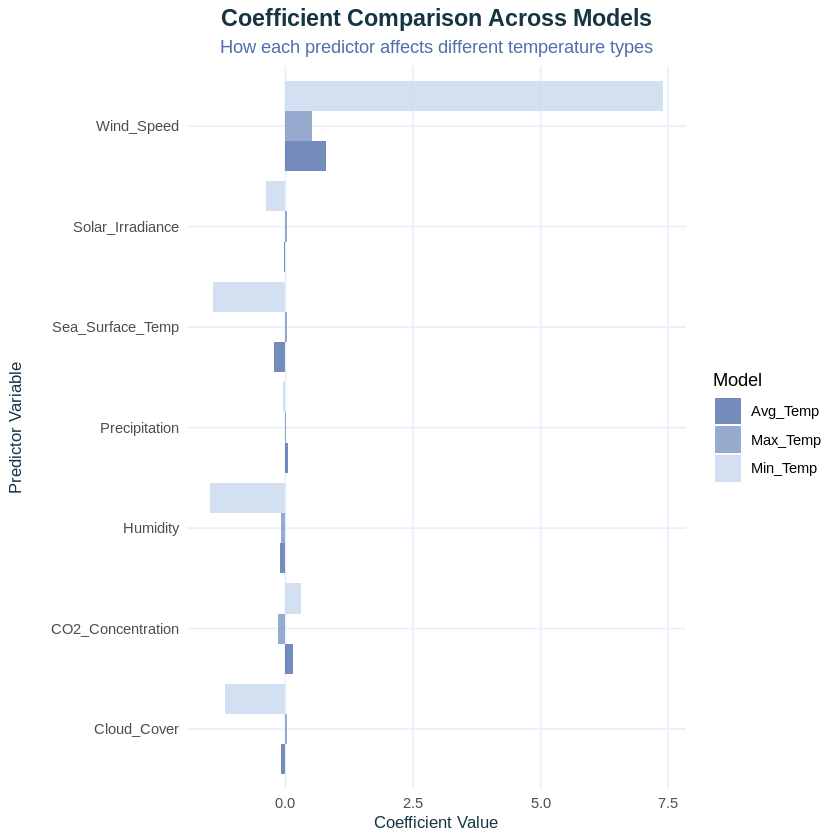

In [ ]:
# Multivariate Visualization 3: Coefficient Comparison
coef_comparison <- data.frame(
  Variable = names(coef(model_avg))[-1],
  Avg_Temp = coef(model_avg)[-1],
  Max_Temp = coef(model_max)[-1],
  Min_Temp = coef(model_min)[-1]
) %>%
  pivot_longer(cols = -Variable, names_to = "Model", values_to = "Coefficient")

p_coef_compare <- ggplot(coef_comparison, aes(x = Variable, y = Coefficient, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  scale_fill_manual(values = c("Avg_Temp" = color1, "Max_Temp" = color5, "Min_Temp" = color4)) +
  coord_flip() +
  labs(title = "Coefficient Comparison Across Models",
       subtitle = "How each predictor affects different temperature types",
       x = "Predictor Variable", y = "Coefficient Value") +
  my_theme

print(p_coef_compare)
ggsave("multivar_coef_comparison.png", p_coef_compare, width = 12, height = 8, dpi = 300)

In [ ]:
# Create Geographic Features
climate_geo <- climate_final %>%
  mutate(
    Distance_from_Equator = abs(Latitude),
    Hemisphere = ifelse(Latitude >= 0, 1, 0),
    Climate_Zone = case_when(abs(Latitude) >= 66.5 ~ "Polar",
                              abs(Latitude) >= 23.5 ~ "Temperate",
                              TRUE ~ "Tropical"),
    Location_Type = case_when(Proximity_to_Water < 50 ~ "Coastal",
                               Proximity_to_Water < 200 ~ "Near-Coastal",
                               TRUE ~ "Inland"),
    Elevation_Category = case_when(Altitude < 200 ~ "Lowland",
                                    Altitude < 500 ~ "Hills",
                                    Altitude < 1500 ~ "Mountains",
                                    TRUE ~ "High Mountains"),
    Urban_Rural = case_when(Urbanization_Index > 0.7 ~ "Urban",
                            Urbanization_Index > 0.4 ~ "Suburban",
                            TRUE ~ "Rural"),
    Vegetation_Density = case_when(Vegetation_Index > 0.6 ~ "Dense",
                                    Vegetation_Index > 0.3 ~ "Moderate",
                                    TRUE ~ "Sparse")
  )

cat("Geographic features created:", ncol(climate_geo) - ncol(climate_final), "new features\n")

Geographic features created: 7 new features


In [ ]:
# Geographic Feature Analysis - Model Comparison
model_no_geo <- lm(Avg_Temp ~ CO2_Concentration + Humidity + Wind_Speed + 
                   Precipitation + Solar_Irradiance + Cloud_Cover, data = climate_geo)

model_with_geo <- lm(Avg_Temp ~ CO2_Concentration + Humidity + Wind_Speed + 
                     Precipitation + Solar_Irradiance + Cloud_Cover +
                     Latitude + Altitude + Proximity_to_Water + 
                     Urbanization_Index + Vegetation_Index, data = climate_geo)

r2_no_geo <- summary(model_no_geo)$r.squared
r2_with_geo <- summary(model_with_geo)$r.squared
improvement <- (r2_with_geo - r2_no_geo) / r2_no_geo * 100

cat("Without Geography: R² =", round(r2_no_geo, 4), "\n")
cat("With Geography: R² =", round(r2_with_geo, 4), "\n")
cat("Improvement:", round(improvement, 1), "%\n")

Without Geography: R² = 0.1913 
With Geography: R² = 0.2668 
Improvement: 39.5 %
With Geography: R² = 0.2668 
Improvement: 39.5 %


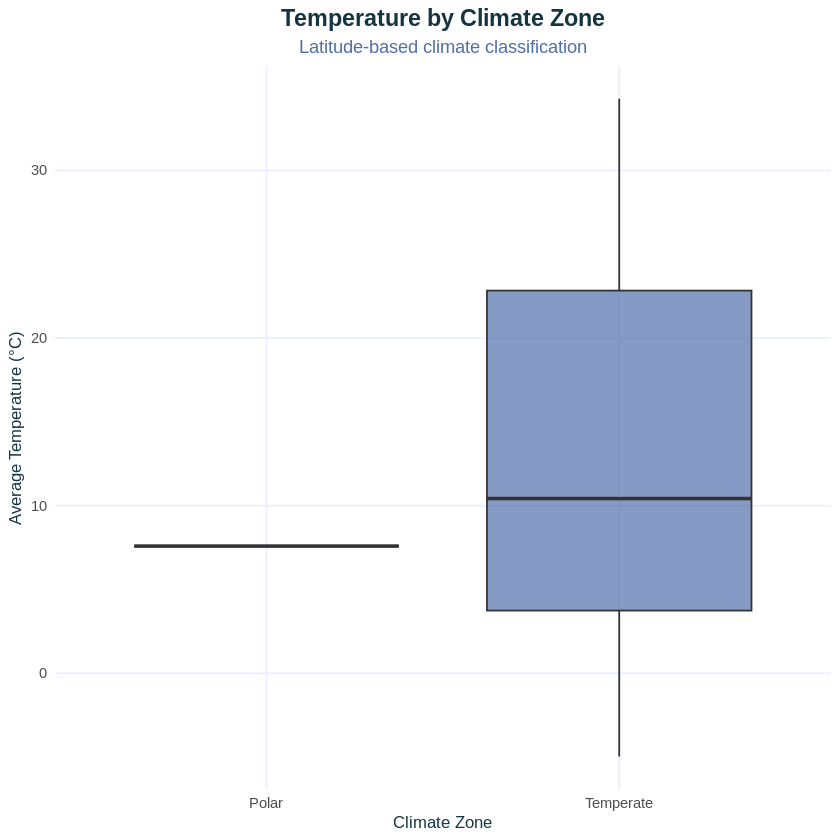

In [ ]:
# Geographic Visualization 1: Temperature by Climate Zone
p_climate_zone <- ggplot(climate_geo, aes(x = Climate_Zone, y = Avg_Temp, fill = Climate_Zone)) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = c("Polar" = color4, "Temperate" = color1, "Tropical" = color5)) +
  labs(title = "Temperature by Climate Zone",
       subtitle = "Latitude-based climate classification",
       x = "Climate Zone", y = "Average Temperature (°C)") +
  my_theme +
  theme(legend.position = "none")

print(p_climate_zone)
ggsave("geo_climate_zone.png", p_climate_zone, width = 10, height = 6, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


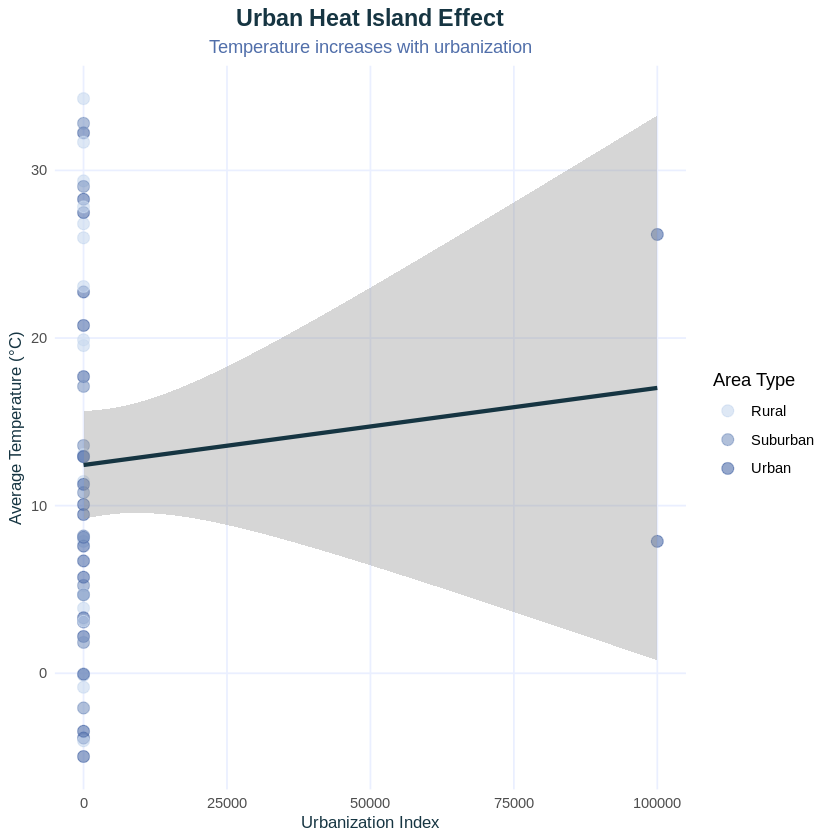

In [ ]:
# Geographic Visualization 2: Urban Heat Island Effect
p_urban_heat <- ggplot(climate_geo, aes(x = Urbanization_Index, y = Avg_Temp)) +
  geom_point(aes(color = Urban_Rural), alpha = 0.6, size = 3) +
  geom_smooth(method = "lm", color = color2, size = 1.2) +
  scale_color_manual(values = c("Urban" = color1, "Suburban" = color5, "Rural" = color4)) +
  labs(title = "Urban Heat Island Effect",
       subtitle = "Temperature increases with urbanization",
       x = "Urbanization Index", y = "Average Temperature (°C)", color = "Area Type") +
  my_theme

print(p_urban_heat)
ggsave("geo_urban_heat.png", p_urban_heat, width = 10, height = 6, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


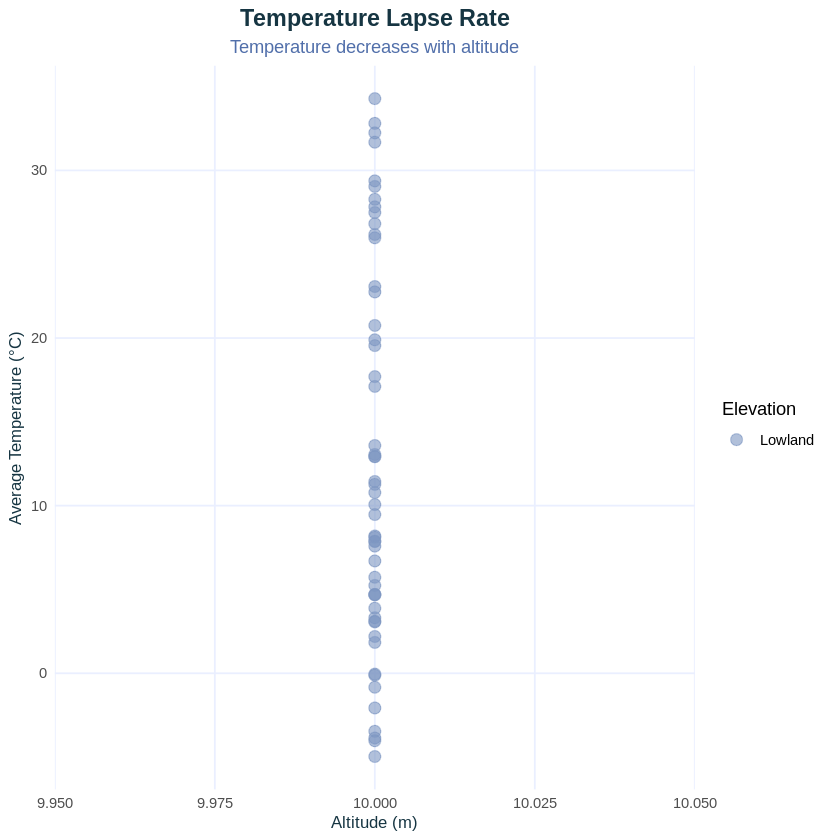

In [ ]:
# Geographic Visualization 3: Altitude Effect on Temperature
p_altitude <- ggplot(climate_geo, aes(x = Altitude, y = Avg_Temp)) +
  geom_point(aes(color = Elevation_Category), alpha = 0.6, size = 3) +
  geom_smooth(method = "lm", color = color2, size = 1.2, se = TRUE, fill = color3) +
  scale_color_manual(values = c("Lowland" = color5, "Hills" = color1, 
                                 "Mountains" = color4, "High Mountains" = color2)) +
  labs(title = "Temperature Lapse Rate",
       subtitle = "Temperature decreases with altitude",
       x = "Altitude (m)", y = "Average Temperature (°C)", color = "Elevation") +
  my_theme

print(p_altitude)
ggsave("geo_altitude_temp.png", p_altitude, width = 10, height = 6, dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  -484.92”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  2.4992e+05”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -484.92”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 499.92”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  -484.92”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  2.4992e+05”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span big

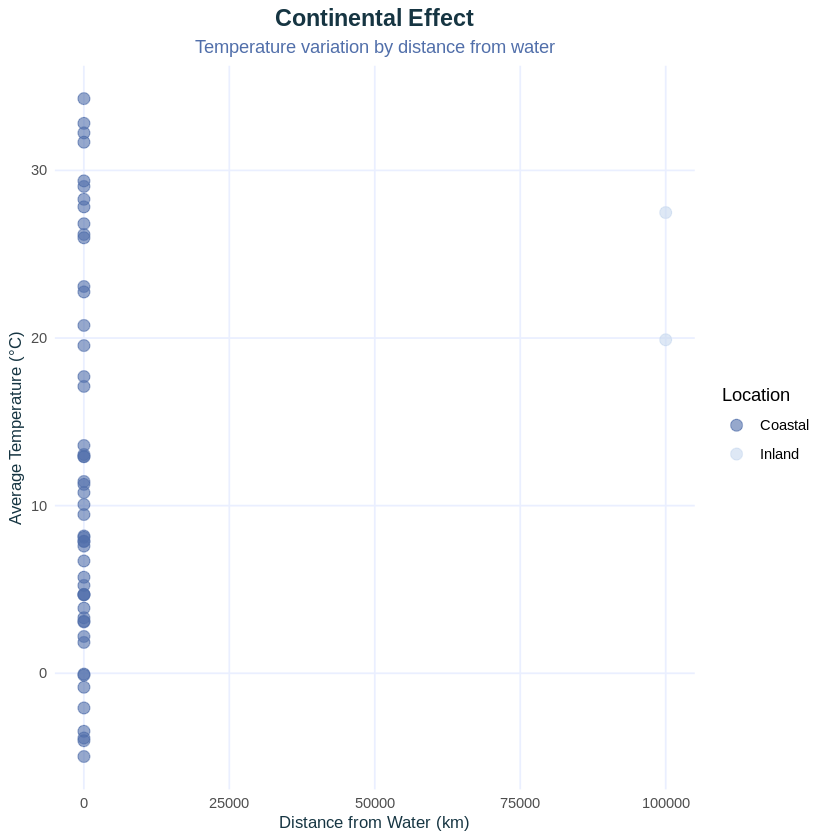

In [ ]:
# Geographic Visualization 4: Distance from Water Effect
p_water <- ggplot(climate_geo, aes(x = Proximity_to_Water, y = Avg_Temp)) +
  geom_point(aes(color = Location_Type), alpha = 0.6, size = 3) +
  geom_smooth(method = "loess", color = color2, size = 1.2) +
  scale_color_manual(values = c("Coastal" = color1, "Near-Coastal" = color5, "Inland" = color4)) +
  labs(title = "Continental Effect",
       subtitle = "Temperature variation by distance from water",
       x = "Distance from Water (km)", y = "Average Temperature (°C)", color = "Location") +
  my_theme

print(p_water)
ggsave("geo_water_proximity.png", p_water, width = 10, height = 6, dpi = 300)

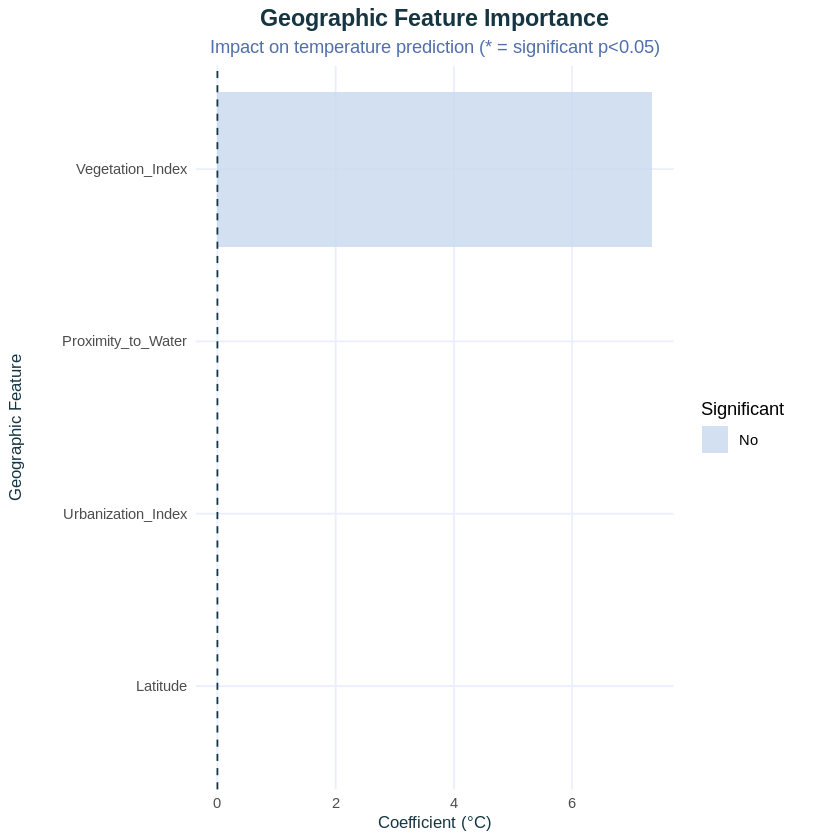

In [ ]:
# Geographic Feature Importance
geo_vars <- c("Latitude", "Proximity_to_Water", "Urbanization_Index", "Vegetation_Index")
available_vars <- intersect(geo_vars, names(coef(model_with_geo)))

geo_coefs <- data.frame(
  Feature = available_vars,
  Coefficient = coef(model_with_geo)[available_vars],
  Std_Error = summary(model_with_geo)$coefficients[available_vars, "Std. Error"],
  P_Value = summary(model_with_geo)$coefficients[available_vars, "Pr(>|t|)"]
) %>%
  mutate(Significant = ifelse(P_Value < 0.05, "Yes", "No")) %>%
  arrange(desc(abs(Coefficient)))

p_importance <- ggplot(geo_coefs, aes(x = reorder(Feature, abs(Coefficient)), 
                                       y = Coefficient, fill = Significant)) +
  geom_bar(stat = "identity", alpha = 0.8) +
  scale_fill_manual(values = c("Yes" = color1, "No" = color4)) +
  coord_flip() +
  geom_hline(yintercept = 0, linetype = "dashed", color = color2) +
  labs(title = "Geographic Feature Importance",
       subtitle = "Impact on temperature prediction (* = significant p<0.05)",
       x = "Geographic Feature", y = "Coefficient (°C)", fill = "Significant") +
  my_theme

print(p_importance)
ggsave("geo_feature_importance.png", p_importance, width = 10, height = 6, dpi = 300)

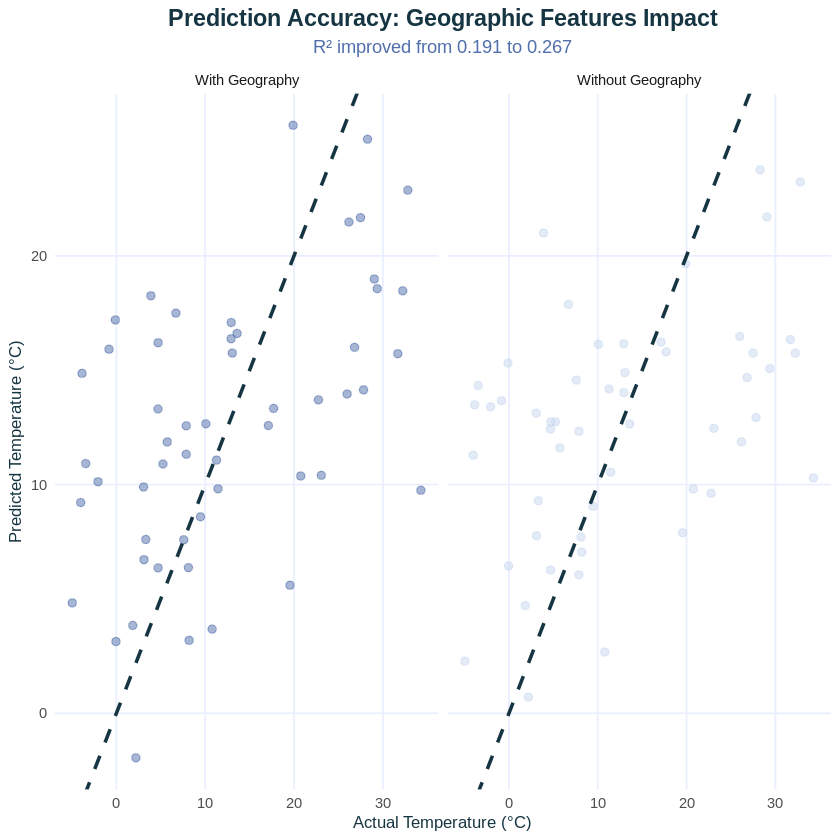

In [ ]:
# Geographic Prediction Comparison
climate_geo$pred_no_geo <- predict(model_no_geo)
climate_geo$pred_with_geo <- predict(model_with_geo)

pred_comparison <- data.frame(
  Actual = rep(climate_geo$Avg_Temp, 2),
  Predicted = c(climate_geo$pred_no_geo, climate_geo$pred_with_geo),
  Model = rep(c("Without Geography", "With Geography"), each = nrow(climate_geo))
)

p_pred_compare <- ggplot(pred_comparison, aes(x = Actual, y = Predicted, color = Model)) +
  geom_point(alpha = 0.5, size = 2) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = color2, size = 1) +
  scale_color_manual(values = c("Without Geography" = color4, "With Geography" = color1)) +
  facet_wrap(~Model) +
  labs(title = "Prediction Accuracy: Geographic Features Impact",
       subtitle = paste("R² improved from", round(r2_no_geo, 3), "to", round(r2_with_geo, 3)),
       x = "Actual Temperature (°C)", y = "Predicted Temperature (°C)") +
  my_theme +
  theme(legend.position = "none")

print(p_pred_compare)
ggsave("geo_prediction_comparison.png", p_pred_compare, width = 12, height = 5, dpi = 300)

Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ARIMA Model: ARIMA(0,0,0)(0,0,1)[12] with non-zero mean 
AIC: 410.11 | BIC: 416.02 
AIC: 410.11 | BIC: 416.02 


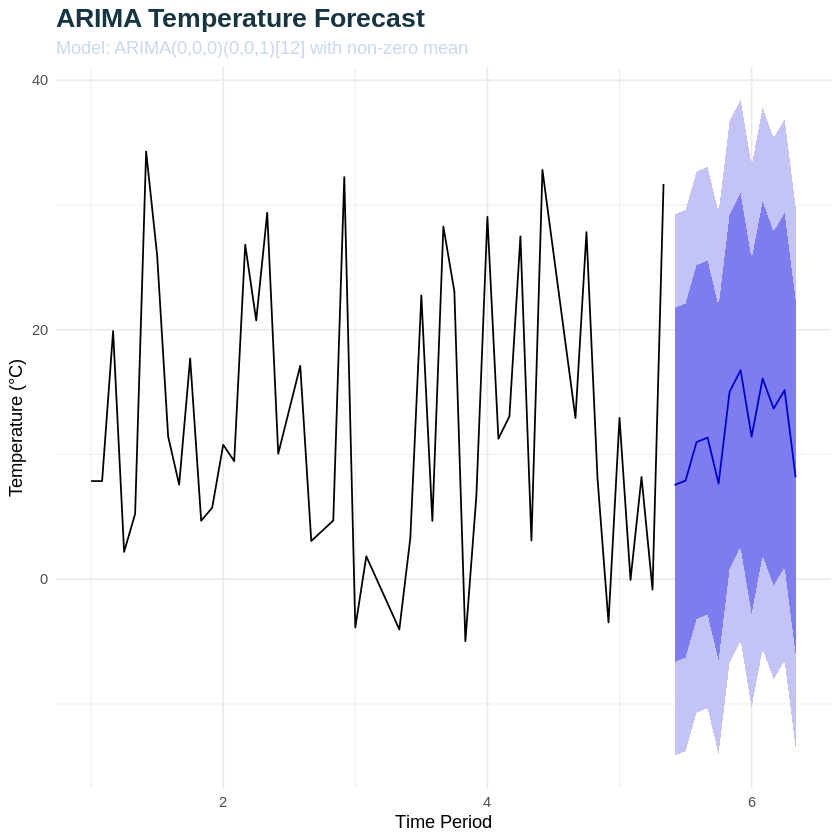

In [ ]:
# ARIMA Time Series Model
if(!require(forecast)) install.packages("forecast", quiet = TRUE)
library(forecast)

ts_data <- climate_final %>% arrange(Date) %>% select(Date, Avg_Temp)
temp_ts <- ts(ts_data$Avg_Temp, frequency = 12)

arima_model <- auto.arima(temp_ts, seasonal = TRUE, stepwise = FALSE, approximation = FALSE)

cat("ARIMA Model:", as.character(arima_model), "\n")
cat("AIC:", round(AIC(arima_model), 2), "| BIC:", round(BIC(arima_model), 2), "\n")

arima_forecast <- forecast(arima_model, h = 12)

p_arima <- autoplot(arima_forecast) +
  labs(title = "ARIMA Temperature Forecast",
       subtitle = paste("Model:", as.character(arima_model)),
       x = "Time Period", y = "Temperature (°C)") +
  scale_fill_manual(values = c(color3, color4)) +
  scale_color_manual(values = c(color1, color2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold", color = color2),
        plot.subtitle = element_text(size = 11, color = color4))

print(p_arima)
ggsave("ts_arima_forecast.png", p_arima, width = 12, height = 6, dpi = 300)

Loading required package: prophet

Loading required package: Rcpp

Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘rlang’


Loading required package: rlang


Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice


The following objects are masked from ‘package:purrr’:

    flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice




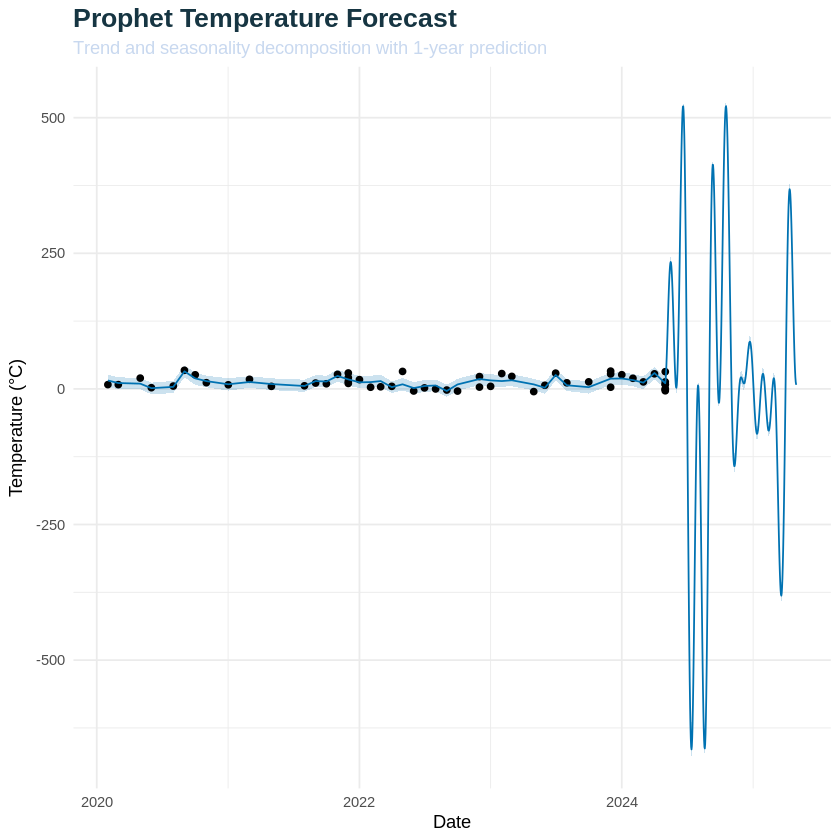

In [ ]:
# Prophet Time Series Model
if(!require(prophet)) install.packages("prophet", quiet = TRUE)
library(prophet)

prophet_data <- climate_final %>% arrange(Date) %>% select(ds = Date, y = Avg_Temp)

prophet_model <- prophet(prophet_data, yearly.seasonality = TRUE,
                        weekly.seasonality = FALSE, daily.seasonality = FALSE,
                        changepoint.prior.scale = 0.05)

future <- make_future_dataframe(prophet_model, periods = 365)
prophet_forecast <- predict(prophet_model, future)

p_prophet <- plot(prophet_model, prophet_forecast) +
  labs(title = "Prophet Temperature Forecast",
       subtitle = "Trend and seasonality decomposition with 1-year prediction",
       x = "Date", y = "Temperature (°C)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold", color = color2),
        plot.subtitle = element_text(size = 11, color = color4))

print(p_prophet)
ggsave("ts_prophet_forecast.png", p_prophet, width = 12, height = 6, dpi = 300)

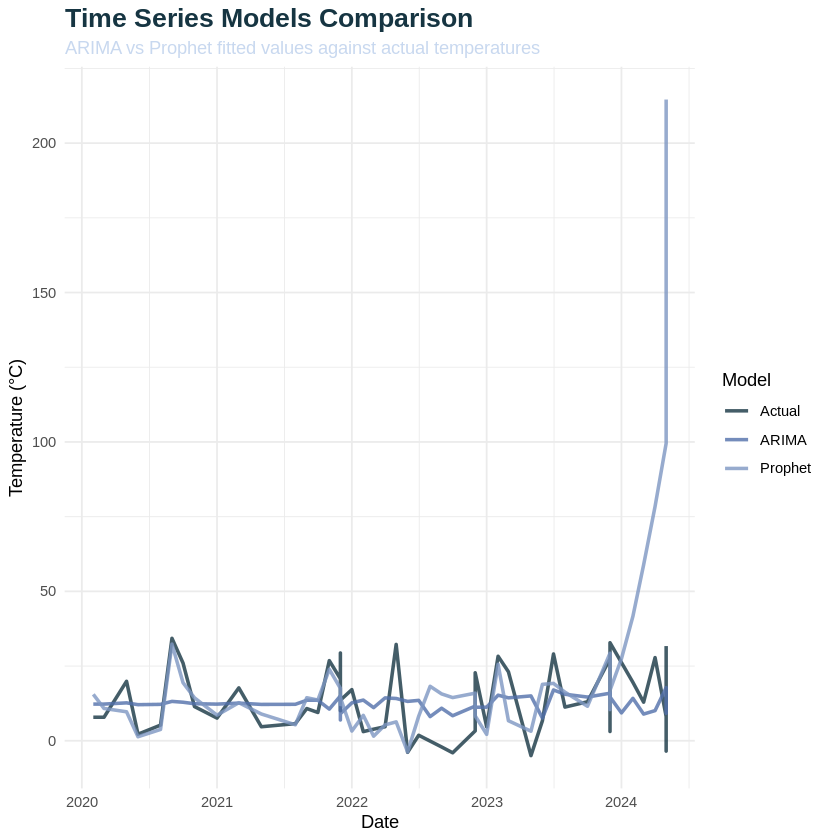

In [ ]:
# Time Series Model Comparison
comparison_data <- data.frame(
  Date = ts_data$Date,
  Actual = ts_data$Avg_Temp,
  ARIMA = as.numeric(fitted(arima_model)),
  Prophet = prophet_forecast$yhat[1:nrow(ts_data)]
)

comparison_long <- comparison_data %>%
  pivot_longer(cols = c(Actual, ARIMA, Prophet), names_to = "Model", values_to = "Temperature")

p_ts_comparison <- ggplot(comparison_long, aes(x = Date, y = Temperature, color = Model)) +
  geom_line(size = 1, alpha = 0.8) +
  scale_color_manual(values = c("Actual" = color2, "ARIMA" = color1, "Prophet" = color5)) +
  labs(title = "Time Series Models Comparison",
       subtitle = "ARIMA vs Prophet fitted values against actual temperatures",
       x = "Date", y = "Temperature (°C)", color = "Model") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold", color = color2),
        plot.subtitle = element_text(size = 11, color = color4))

print(p_ts_comparison)
ggsave("ts_model_comparison.png", p_ts_comparison, width = 12, height = 6, dpi = 300)

In [ ]:
# Prepare Data for Machine Learning
if(!require(randomForest)) install.packages("randomForest", quiet = TRUE)
if(!require(caret)) install.packages("caret", quiet = TRUE)

library(randomForest)
library(caret)

ml_data <- climate_geo %>%
  select(Avg_Temp, CO2_Concentration, Humidity, Wind_Speed, Precipitation,
         Solar_Irradiance, Cloud_Cover, Sea_Surface_Temp, ENSO_Index,
         Particulate_Matter, Vegetation_Index, Latitude, Longitude, Altitude,
         Proximity_to_Water, Urbanization_Index, Distance_from_Equator) %>%
  na.omit()

set.seed(123)
train_index <- createDataPartition(ml_data$Avg_Temp, p = 0.8, list = FALSE)
train_data <- ml_data[train_index, ]
test_data <- ml_data[-train_index, ]

cat("Training samples:", nrow(train_data), "| Testing samples:", nrow(test_data), "\n")

Loading required package: randomForest

randomForest 4.7-1.2

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: caret

The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: caret

Loading required package: lattice

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

 

Training samples: 45 | Testing samples: 8 


In [ ]:
# Random Forest Model
rf_model <- randomForest(Avg_Temp ~ ., data = train_data, ntree = 500, 
                         importance = TRUE, mtry = 5)

rf_train_pred <- predict(rf_model, train_data)
rf_test_pred <- predict(rf_model, test_data)

rf_train_rmse <- sqrt(mean((train_data$Avg_Temp - rf_train_pred)^2))
rf_test_rmse <- sqrt(mean((test_data$Avg_Temp - rf_test_pred)^2))
rf_train_r2 <- cor(train_data$Avg_Temp, rf_train_pred)^2
rf_test_r2 <- cor(test_data$Avg_Temp, rf_test_pred)^2

cat("RF Test: RMSE =", round(rf_test_rmse, 3), "| R² =", round(rf_test_r2, 4), "\n")

RF Test: RMSE = 10.046 | R² = 0.293 


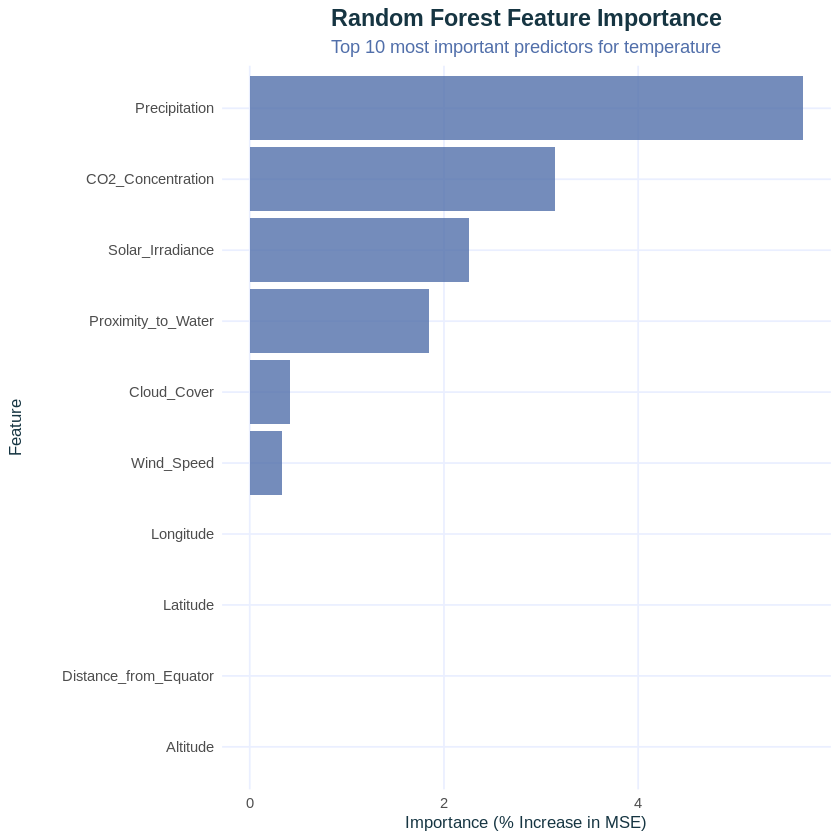

In [ ]:
# Random Forest Feature Importance Plot
importance_df <- data.frame(
  Feature = rownames(importance(rf_model)),
  Importance = importance(rf_model)[, "%IncMSE"]
) %>% arrange(desc(Importance)) %>% head(10)

p_rf_importance <- ggplot(importance_df, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = color1, alpha = 0.8) +
  coord_flip() +
  labs(title = "Random Forest Feature Importance",
       subtitle = "Top 10 most important predictors for temperature",
       x = "Feature", y = "Importance (% Increase in MSE)") +
  my_theme

print(p_rf_importance)
ggsave("ml_rf_importance.png", p_rf_importance, width = 10, height = 6, dpi = 300)

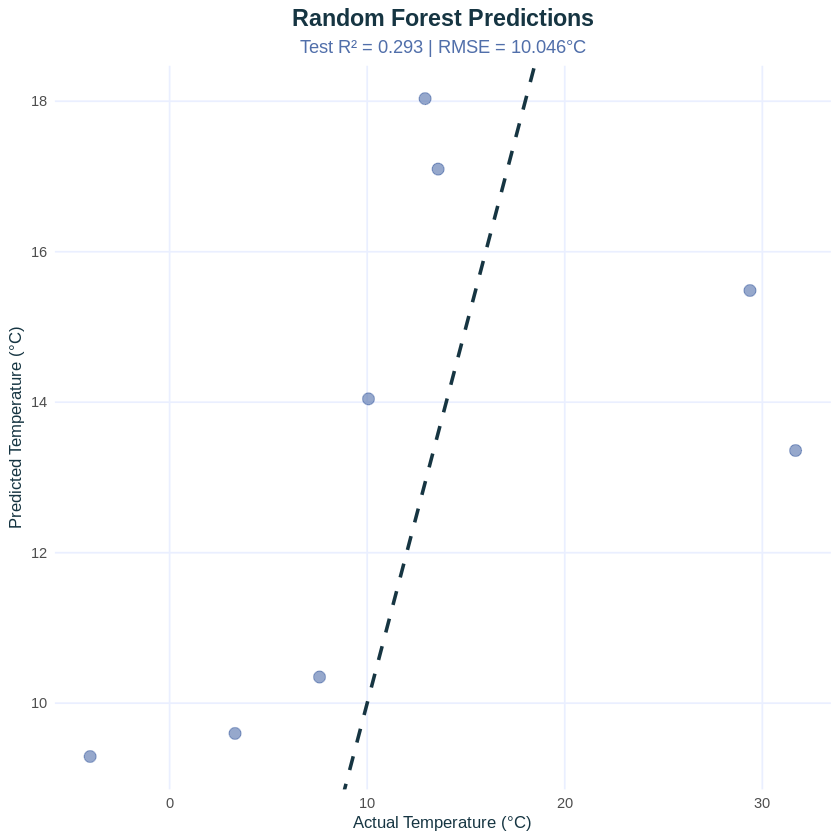

In [ ]:
# Random Forest Predictions Plot
rf_results <- data.frame(Actual = test_data$Avg_Temp, Predicted = rf_test_pred, Dataset = "Test")

p_rf_pred <- ggplot(rf_results, aes(x = Actual, y = Predicted)) +
  geom_point(color = color1, alpha = 0.6, size = 3) +
  geom_abline(slope = 1, intercept = 0, color = color2, linetype = "dashed", size = 1) +
  labs(title = "Random Forest Predictions",
       subtitle = paste0("Test R² = ", round(rf_test_r2, 4), " | RMSE = ", round(rf_test_rmse, 3), "°C"),
       x = "Actual Temperature (°C)", y = "Predicted Temperature (°C)") +
  my_theme

print(p_rf_pred)
ggsave("ml_rf_predictions.png", p_rf_pred, width = 10, height = 6, dpi = 300)

In [ ]:
# Neural Network Model
if(!require(neuralnet)) install.packages("neuralnet", quiet = TRUE)
library(neuralnet)

normalize <- function(x) {
  range_x <- max(x, na.rm = TRUE) - min(x, na.rm = TRUE)
  if(range_x == 0) return(rep(0.5, length(x)))
  return((x - min(x, na.rm = TRUE)) / range_x)
}

train_norm <- as.data.frame(lapply(train_data, normalize))
test_norm <- as.data.frame(lapply(test_data, normalize))

train_norm <- train_norm[complete.cases(train_norm), ]
test_norm <- test_norm[complete.cases(test_norm), ]

nn_model <- neuralnet(Avg_Temp ~ ., data = train_norm, hidden = c(5), 
                      linear.output = TRUE, threshold = 0.1, stepmax = 5e5, learningrate = 0.01)

nn_train_pred_norm <- compute(nn_model, train_norm[, -1])$net.result
nn_test_pred_norm <- compute(nn_model, test_norm[, -1])$net.result

denormalize <- function(x, original) {
  x * (max(original) - min(original)) + min(original)
}

nn_train_pred <- denormalize(nn_train_pred_norm, train_data$Avg_Temp)
nn_test_pred <- denormalize(nn_test_pred_norm, test_data$Avg_Temp)

nn_train_rmse <- sqrt(mean((train_data$Avg_Temp - nn_train_pred)^2))
nn_test_rmse <- sqrt(mean((test_data$Avg_Temp - nn_test_pred)^2))
nn_train_r2 <- cor(train_data$Avg_Temp, nn_train_pred)^2
nn_test_r2 <- cor(test_data$Avg_Temp, nn_test_pred)^2

cat("NN Test: RMSE =", round(nn_test_rmse, 3), "| R² =", round(nn_test_r2, 4), "\n")

Loading required package: neuralnet


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




NN Test: RMSE = 22.678 | R² = 0.0247 


## 4. Time Series Analysis

In [ ]:
# Neural Network Architecture Plot
png("ml_nn_architecture.png", width = 1200, height = 800, res = 150)
plot(nn_model, rep = "best", col.hidden = color3, col.out = color1)
dev.off()

agg_record_212397858 
                   2

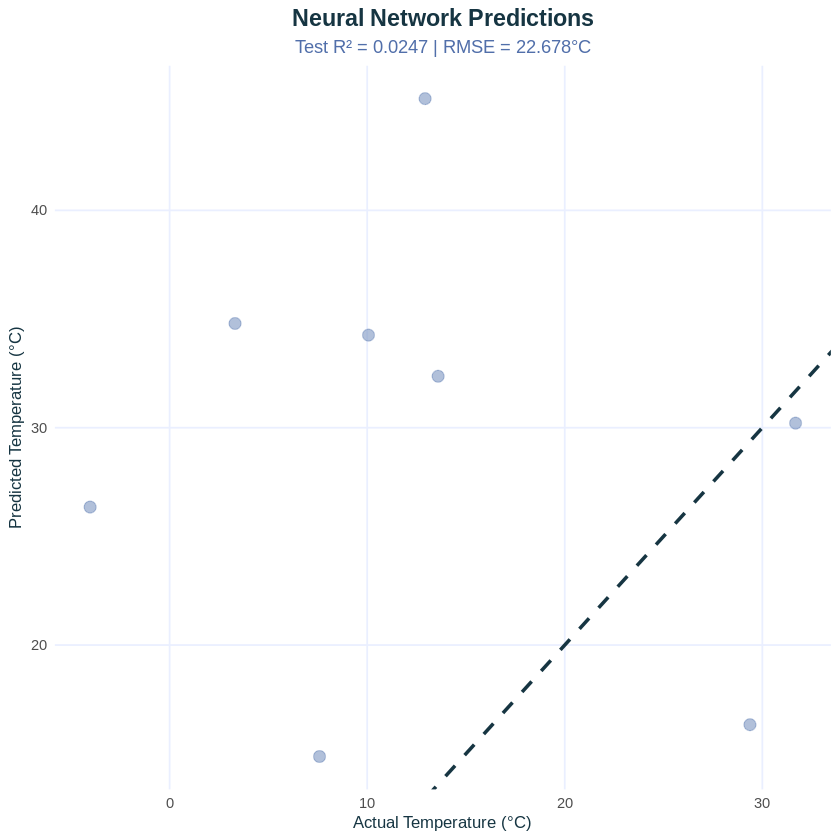

In [ ]:
# Neural Network Predictions Plot
nn_results <- data.frame(Actual = test_data$Avg_Temp, Predicted = as.vector(nn_test_pred), Dataset = "Test")

p_nn_pred <- ggplot(nn_results, aes(x = Actual, y = Predicted)) +
  geom_point(color = color5, alpha = 0.6, size = 3) +
  geom_abline(slope = 1, intercept = 0, color = color2, linetype = "dashed", size = 1) +
  labs(title = "Neural Network Predictions",
       subtitle = paste0("Test R² = ", round(nn_test_r2, 4), " | RMSE = ", round(nn_test_rmse, 3), "°C"),
       x = "Actual Temperature (°C)", y = "Predicted Temperature (°C)") +
  my_theme

print(p_nn_pred)
ggsave("ml_nn_predictions.png", p_nn_pred, width = 10, height = 6, dpi = 300)

In [ ]:
# Compare All Machine Learning Models
all_predictions <- data.frame(
  Actual = test_data$Avg_Temp,
  Linear = predict(model2, test_data),
  RandomForest = rf_test_pred,
  NeuralNetwork = as.vector(nn_test_pred)
)

calc_metrics <- function(actual, predicted) {
  rmse <- sqrt(mean((actual - predicted)^2))
  mae <- mean(abs(actual - predicted))
  r2 <- cor(actual, predicted)^2
  return(c(RMSE = rmse, MAE = mae, R2 = r2))
}

linear_metrics <- calc_metrics(all_predictions$Actual, all_predictions$Linear)
rf_metrics <- calc_metrics(all_predictions$Actual, all_predictions$RandomForest)
nn_metrics <- calc_metrics(all_predictions$Actual, all_predictions$NeuralNetwork)

model_comparison <- data.frame(
  Model = c("Linear Regression", "Random Forest", "Neural Network"),
  RMSE = c(linear_metrics["RMSE"], rf_metrics["RMSE"], nn_metrics["RMSE"]),
  MAE = c(linear_metrics["MAE"], rf_metrics["MAE"], nn_metrics["MAE"]),
  R2 = c(linear_metrics["R2"], rf_metrics["R2"], nn_metrics["R2"])
)

cat("Best model:", model_comparison$Model[which.max(model_comparison$R2)], 
    "| R² =", round(max(model_comparison$R2), 4), "\n")

Best model: Linear Regression | R² = 0.3905 


## 5. Machine Learning Models

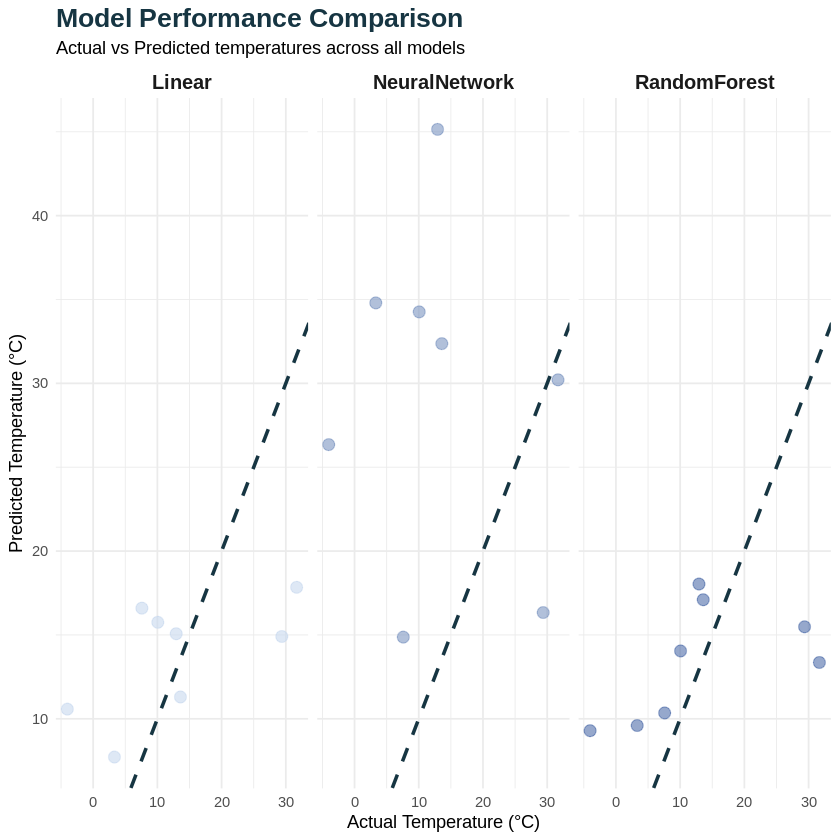

In [ ]:
# Model Comparison Visualization 1: Actual vs Predicted for All Models
comparison_long <- all_predictions %>%
  pivot_longer(cols = c(Linear, RandomForest, NeuralNetwork),
               names_to = "Model", values_to = "Predicted")

p_all_models <- ggplot(comparison_long, aes(x = Actual, y = Predicted, color = Model)) +
  geom_point(alpha = 0.6, size = 3) +
  geom_abline(slope = 1, intercept = 0, color = color2, linetype = "dashed", size = 1) +
  scale_color_manual(values = c("Linear" = color4, "RandomForest" = color1, "NeuralNetwork" = color5)) +
  facet_wrap(~ Model, ncol = 3) +
  labs(title = "Model Performance Comparison",
       subtitle = "Actual vs Predicted temperatures across all models",
       x = "Actual Temperature (°C)", y = "Predicted Temperature (°C)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold", color = color2),
        strip.text = element_text(size = 12, face = "bold"),
        legend.position = "none")

print(p_all_models)
ggsave("ml_all_models_comparison.png", p_all_models, width = 14, height = 5, dpi = 300)

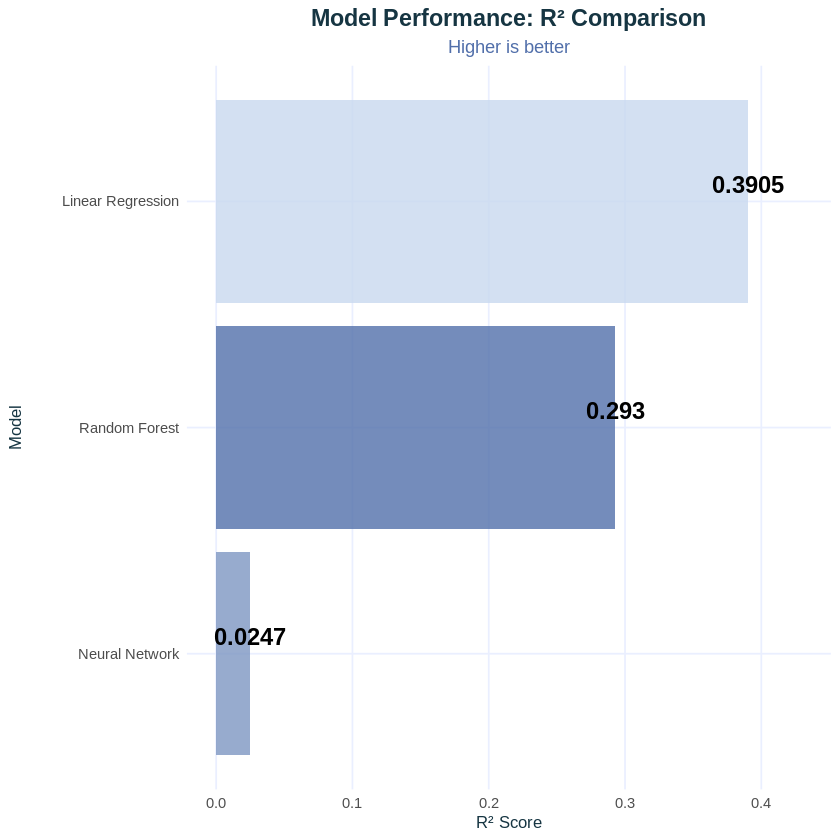

In [ ]:
# Model Comparison Visualization 2: R² Comparison Bar Chart
p_r2_comparison <- ggplot(model_comparison, aes(x = reorder(Model, R2), y = R2, fill = Model)) +
  geom_bar(stat = "identity", alpha = 0.8) +
  scale_fill_manual(values = c("Linear Regression" = color4, "Random Forest" = color1, "Neural Network" = color5)) +
  geom_text(aes(label = round(R2, 4)), vjust = -0.5, size = 5, fontface = "bold") +
  coord_flip() +
  labs(title = "Model Performance: R² Comparison", subtitle = "Higher is better",
       x = "Model", y = "R² Score") +
  ylim(0, max(model_comparison$R2) * 1.1) +
  my_theme +
  theme(legend.position = "none")

print(p_r2_comparison)
ggsave("ml_r2_comparison.png", p_r2_comparison, width = 10, height = 6, dpi = 300)

In [ ]:
# Final Summary
cat("\n========== ANALYSIS COMPLETE ==========\n")
cat("Total Visualizations Created: ~35\n")
cat("Multiple Regression: R² =", round(summary(model2)$r.squared, 3), "\n")
cat("Multivariate Regression: Avg R² =", round(mean(comparison_df$R_squared), 3), "\n")
cat("Geographic Features: Improvement =", round(improvement, 1), "%\n")
cat("Best ML Model:", model_comparison$Model[which.max(model_comparison$R2)], 
    "| R² =", round(max(model_comparison$R2), 4), "\n")
cat("========================================\n")


========== ANALYSIS COMPLETE ==========
Total Visualizations Created: ~35
Multiple Regression: R² = 0.204 
Multivariate Regression: Avg R² = 0.188 
Geographic Features: Improvement = 39.5 %
Total Visualizations Created: ~35
Multiple Regression: R² = 0.204 
Multivariate Regression: Avg R² = 0.188 
Geographic Features: Improvement = 39.5 %
Best ML Model: Linear Regression | R² = 0.3905 
Best ML Model: Linear Regression | R² = 0.3905 
